# Modeling after PCA implementation
In previous part of my work, I've trained several diffrent models to check how they perform. I choose those that had the highest AUROC scores: Logistic Regression with KFold validation, CatBoost with KFold validation, Random Forest Classifier with KFold validation, SVM KFold with validation. The fifth is first model train without validation - AdaBoost Classifiers. Those 5 models I'm going to check with PCA method.

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#importing the PCA scaling library
from sklearn.decomposition import PCA
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import Ridge, Lasso
# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsClassifier
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeClassifier
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier)
# Import support vector regressor machine learning library
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,  roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dummies_loan_status = pd.read_csv('dummies_loan_status')

In [41]:
X = dummies_loan_status.drop('loan_status', axis = 1)
y = dummies_loan_status.loan_status

In [42]:
# some features are very skew, I need to normalize them
scaler = StandardScaler()
scaler.fit_transform(X)
X_scaled = scaler.transform(X)
scaled_data = pd.DataFrame(X_scaled, columns= X.columns)

In [43]:
scaled_data.shape

(42535, 63)

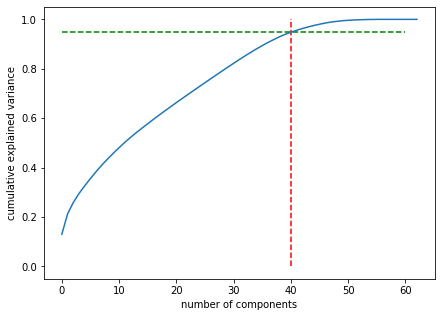

In [44]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=60, xmin=0, colors="g", linestyles="--")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.gcf().set_size_inches(7, 5)

In [45]:
from sklearn.decomposition import IncrementalPCA

pca = IncrementalPCA(n_components = 40)
colnames = list(scaled_data.columns)
loans_dummies_pca = pca.fit_transform(X_scaled)
loans_dummies_pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1]}) #columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'],
loans_dummies_pca_df.head()

,PC1,PC2
0,0.325437,0.058250
1,0.327771,0.056931
2,0.153939,-0.065523
3,0.161086,-0.349626
4,0.307453,0.045364


In [46]:
print(X.shape)
print(loans_dummies_pca.shape)

(42535, 63)
(42535, 40)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(loans_dummies_pca, y, test_size=0.2, random_state=0)

In [65]:
model_pca_LR = LogisticRegression(max_iter=10000)
model_pca_LR.fit(X_train, y_train)
model_pca_LR.score(X_test,y_test)
predictions_pca_LR = model_pca_LR.predict(X_test)

In [66]:
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state = 77)
acc_KF_LR=np.mean(abs(cross_val_score(model_pca_LR,X, y, cv=kfold)))
AUROC_KF_LR = np.mean(abs(cross_val_score(model_pca_LR, X, y, scoring='roc_auc', cv=10)))

In [68]:
results = pd.DataFrame({'Method':['Logistic Regression KFold PCA'], 'accuracy': acc_KF_LR, 'AUROC': AUROC_KF_LR},index={'1'})
results = results[['Method', 'accuracy', 'AUROC']]
results

,Method,accuracy,AUROC
1,Logistic Regression PCA,0.999976,1.0


In [71]:
from catboost import CatBoostClassifier
model_CB = CatBoostClassifier(early_stopping_rounds=10, iterations = 949)
model_CB.fit(X_train,y_train, eval_set=(X_test, y_test))
model_CB.score(X_test,y_test)

Learning rate set to 0.075731
0:	learn: 0.6216081	test: 0.6215066	best: 0.6215066 (0)	total: 20.9ms	remaining: 20.9s
1:	learn: 0.5628192	test: 0.5632743	best: 0.5632743 (1)	total: 37.5ms	remaining: 18.7s
2:	learn: 0.5130420	test: 0.5144610	best: 0.5144610 (2)	total: 52.9ms	remaining: 17.6s
3:	learn: 0.4727062	test: 0.4747503	best: 0.4747503 (3)	total: 68.2ms	remaining: 17s
4:	learn: 0.4457848	test: 0.4485320	best: 0.4485320 (4)	total: 83ms	remaining: 16.5s
5:	learn: 0.4204614	test: 0.4233738	best: 0.4233738 (5)	total: 98.9ms	remaining: 16.4s
6:	learn: 0.4009442	test: 0.4046404	best: 0.4046404 (6)	total: 141ms	remaining: 20s
7:	learn: 0.3823366	test: 0.3865563	best: 0.3865563 (7)	total: 158ms	remaining: 19.6s
8:	learn: 0.3669713	test: 0.3716288	best: 0.3716288 (8)	total: 174ms	remaining: 19.1s
9:	learn: 0.3552349	test: 0.3603590	best: 0.3603590 (9)	total: 191ms	remaining: 18.9s
10:	learn: 0.3441610	test: 0.3496834	best: 0.3496834 (10)	total: 210ms	remaining: 18.9s
11:	learn: 0.3335148	t

99:	learn: 0.2047746	test: 0.2233949	best: 0.2233949 (99)	total: 2.31s	remaining: 20.8s
100:	learn: 0.2043282	test: 0.2230735	best: 0.2230735 (100)	total: 2.32s	remaining: 20.7s
101:	learn: 0.2040017	test: 0.2228245	best: 0.2228245 (101)	total: 2.34s	remaining: 20.6s
102:	learn: 0.2033470	test: 0.2221479	best: 0.2221479 (102)	total: 2.36s	remaining: 20.5s
103:	learn: 0.2029369	test: 0.2218814	best: 0.2218814 (103)	total: 2.37s	remaining: 20.4s
104:	learn: 0.2023827	test: 0.2213946	best: 0.2213946 (104)	total: 2.41s	remaining: 20.6s
105:	learn: 0.2019813	test: 0.2209416	best: 0.2209416 (105)	total: 2.43s	remaining: 20.5s
106:	learn: 0.2015147	test: 0.2207126	best: 0.2207126 (106)	total: 2.44s	remaining: 20.4s
107:	learn: 0.2010069	test: 0.2203341	best: 0.2203341 (107)	total: 2.49s	remaining: 20.6s
108:	learn: 0.2004022	test: 0.2199225	best: 0.2199225 (108)	total: 2.52s	remaining: 20.6s
109:	learn: 0.1998583	test: 0.2194861	best: 0.2194861 (109)	total: 2.53s	remaining: 20.5s
110:	learn: 

196:	learn: 0.1655273	test: 0.1942739	best: 0.1942739 (196)	total: 4.96s	remaining: 20.2s
197:	learn: 0.1651121	test: 0.1940675	best: 0.1940675 (197)	total: 5s	remaining: 20.3s
198:	learn: 0.1647750	test: 0.1938362	best: 0.1938362 (198)	total: 5.02s	remaining: 20.2s
199:	learn: 0.1644456	test: 0.1937174	best: 0.1937174 (199)	total: 5.05s	remaining: 20.2s
200:	learn: 0.1640838	test: 0.1934424	best: 0.1934424 (200)	total: 5.09s	remaining: 20.2s
201:	learn: 0.1638039	test: 0.1932250	best: 0.1932250 (201)	total: 5.1s	remaining: 20.2s
202:	learn: 0.1635687	test: 0.1930582	best: 0.1930582 (202)	total: 5.12s	remaining: 20.1s
203:	learn: 0.1632519	test: 0.1928671	best: 0.1928671 (203)	total: 5.14s	remaining: 20.1s
204:	learn: 0.1629764	test: 0.1926048	best: 0.1926048 (204)	total: 5.18s	remaining: 20.1s
205:	learn: 0.1627074	test: 0.1923973	best: 0.1923973 (205)	total: 5.2s	remaining: 20.1s
206:	learn: 0.1624484	test: 0.1922183	best: 0.1922183 (206)	total: 5.22s	remaining: 20s
207:	learn: 0.162

295:	learn: 0.1394129	test: 0.1784622	best: 0.1784622 (295)	total: 7.63s	remaining: 18.1s
296:	learn: 0.1391911	test: 0.1783695	best: 0.1783695 (296)	total: 7.67s	remaining: 18.2s
297:	learn: 0.1389670	test: 0.1782070	best: 0.1782070 (297)	total: 7.69s	remaining: 18.1s
298:	learn: 0.1386633	test: 0.1779235	best: 0.1779235 (298)	total: 7.7s	remaining: 18.1s
299:	learn: 0.1384482	test: 0.1777233	best: 0.1777233 (299)	total: 7.76s	remaining: 18.1s
300:	learn: 0.1381869	test: 0.1775786	best: 0.1775786 (300)	total: 7.8s	remaining: 18.1s
301:	learn: 0.1379262	test: 0.1774484	best: 0.1774484 (301)	total: 7.85s	remaining: 18.1s
302:	learn: 0.1376596	test: 0.1772050	best: 0.1772050 (302)	total: 7.89s	remaining: 18.1s
303:	learn: 0.1374485	test: 0.1770577	best: 0.1770577 (303)	total: 7.92s	remaining: 18.1s
304:	learn: 0.1372685	test: 0.1769866	best: 0.1769866 (304)	total: 7.96s	remaining: 18.1s
305:	learn: 0.1370444	test: 0.1767871	best: 0.1767871 (305)	total: 8.01s	remaining: 18.2s
306:	learn: 

389:	learn: 0.1209958	test: 0.1679692	best: 0.1679692 (389)	total: 11.2s	remaining: 17.5s
390:	learn: 0.1208492	test: 0.1678660	best: 0.1678660 (390)	total: 11.2s	remaining: 17.5s
391:	learn: 0.1206819	test: 0.1678297	best: 0.1678297 (391)	total: 11.3s	remaining: 17.5s
392:	learn: 0.1205013	test: 0.1678238	best: 0.1678238 (392)	total: 11.3s	remaining: 17.5s
393:	learn: 0.1203550	test: 0.1677091	best: 0.1677091 (393)	total: 11.3s	remaining: 17.4s
394:	learn: 0.1201651	test: 0.1675909	best: 0.1675909 (394)	total: 11.4s	remaining: 17.4s
395:	learn: 0.1199832	test: 0.1674696	best: 0.1674696 (395)	total: 11.4s	remaining: 17.4s
396:	learn: 0.1198558	test: 0.1674118	best: 0.1674118 (396)	total: 11.5s	remaining: 17.4s
397:	learn: 0.1196781	test: 0.1673597	best: 0.1673597 (397)	total: 11.5s	remaining: 17.4s
398:	learn: 0.1195318	test: 0.1673429	best: 0.1673429 (398)	total: 11.5s	remaining: 17.4s
399:	learn: 0.1193235	test: 0.1671844	best: 0.1671844 (399)	total: 11.6s	remaining: 17.3s
400:	learn

483:	learn: 0.1067965	test: 0.1609888	best: 0.1609888 (483)	total: 14.8s	remaining: 15.8s
484:	learn: 0.1066782	test: 0.1609474	best: 0.1609474 (484)	total: 14.9s	remaining: 15.8s
485:	learn: 0.1065519	test: 0.1609122	best: 0.1609122 (485)	total: 14.9s	remaining: 15.8s
486:	learn: 0.1063825	test: 0.1608677	best: 0.1608677 (486)	total: 14.9s	remaining: 15.7s
487:	learn: 0.1062732	test: 0.1608198	best: 0.1608198 (487)	total: 15s	remaining: 15.7s
488:	learn: 0.1061236	test: 0.1607354	best: 0.1607354 (488)	total: 15s	remaining: 15.7s
489:	learn: 0.1059560	test: 0.1605452	best: 0.1605452 (489)	total: 15.1s	remaining: 15.7s
490:	learn: 0.1058464	test: 0.1605395	best: 0.1605395 (490)	total: 15.1s	remaining: 15.6s
491:	learn: 0.1057327	test: 0.1605202	best: 0.1605202 (491)	total: 15.1s	remaining: 15.6s
492:	learn: 0.1055885	test: 0.1603219	best: 0.1603219 (492)	total: 15.2s	remaining: 15.6s
493:	learn: 0.1054662	test: 0.1602708	best: 0.1602708 (493)	total: 15.2s	remaining: 15.6s
494:	learn: 0.

578:	learn: 0.0948047	test: 0.1558130	best: 0.1558130 (578)	total: 18.5s	remaining: 13.5s
579:	learn: 0.0946721	test: 0.1557804	best: 0.1557804 (579)	total: 18.6s	remaining: 13.5s
580:	learn: 0.0945898	test: 0.1557297	best: 0.1557297 (580)	total: 18.6s	remaining: 13.4s
581:	learn: 0.0944858	test: 0.1557201	best: 0.1557201 (581)	total: 18.7s	remaining: 13.4s
582:	learn: 0.0943419	test: 0.1556421	best: 0.1556421 (582)	total: 18.7s	remaining: 13.4s
583:	learn: 0.0942348	test: 0.1555872	best: 0.1555872 (583)	total: 18.7s	remaining: 13.3s
584:	learn: 0.0941450	test: 0.1556100	best: 0.1555872 (583)	total: 18.8s	remaining: 13.3s
585:	learn: 0.0940410	test: 0.1555624	best: 0.1555624 (585)	total: 18.8s	remaining: 13.3s
586:	learn: 0.0939260	test: 0.1554954	best: 0.1554954 (586)	total: 18.9s	remaining: 13.3s
587:	learn: 0.0938167	test: 0.1554426	best: 0.1554426 (587)	total: 18.9s	remaining: 13.2s
588:	learn: 0.0936975	test: 0.1553858	best: 0.1553858 (588)	total: 18.9s	remaining: 13.2s
589:	learn

674:	learn: 0.0848283	test: 0.1518128	best: 0.1518128 (674)	total: 22.1s	remaining: 10.6s
675:	learn: 0.0846970	test: 0.1518329	best: 0.1518128 (674)	total: 22.1s	remaining: 10.6s
676:	learn: 0.0845847	test: 0.1518470	best: 0.1518128 (674)	total: 22.2s	remaining: 10.6s
677:	learn: 0.0844775	test: 0.1518027	best: 0.1518027 (677)	total: 22.2s	remaining: 10.5s
678:	learn: 0.0843527	test: 0.1517531	best: 0.1517531 (678)	total: 22.2s	remaining: 10.5s
679:	learn: 0.0842550	test: 0.1517252	best: 0.1517252 (679)	total: 22.3s	remaining: 10.5s
680:	learn: 0.0841677	test: 0.1517304	best: 0.1517252 (679)	total: 22.3s	remaining: 10.4s
681:	learn: 0.0840629	test: 0.1517000	best: 0.1517000 (681)	total: 22.3s	remaining: 10.4s
682:	learn: 0.0839828	test: 0.1517252	best: 0.1517000 (681)	total: 22.4s	remaining: 10.4s
683:	learn: 0.0838754	test: 0.1516508	best: 0.1516508 (683)	total: 22.4s	remaining: 10.3s
684:	learn: 0.0837746	test: 0.1516595	best: 0.1516508 (683)	total: 22.4s	remaining: 10.3s
685:	learn

769:	learn: 0.0760416	test: 0.1489959	best: 0.1489959 (769)	total: 25.4s	remaining: 7.58s
770:	learn: 0.0759479	test: 0.1489953	best: 0.1489953 (770)	total: 25.4s	remaining: 7.55s
771:	learn: 0.0758587	test: 0.1488784	best: 0.1488784 (771)	total: 25.5s	remaining: 7.52s
772:	learn: 0.0757821	test: 0.1488164	best: 0.1488164 (772)	total: 25.5s	remaining: 7.49s
773:	learn: 0.0757133	test: 0.1488193	best: 0.1488164 (772)	total: 25.5s	remaining: 7.46s
774:	learn: 0.0756563	test: 0.1488215	best: 0.1488164 (772)	total: 25.6s	remaining: 7.42s
775:	learn: 0.0755739	test: 0.1488270	best: 0.1488164 (772)	total: 25.6s	remaining: 7.39s
776:	learn: 0.0754859	test: 0.1487656	best: 0.1487656 (776)	total: 25.6s	remaining: 7.36s
777:	learn: 0.0754278	test: 0.1487631	best: 0.1487631 (777)	total: 25.7s	remaining: 7.33s
778:	learn: 0.0753512	test: 0.1487635	best: 0.1487631 (777)	total: 25.7s	remaining: 7.29s
779:	learn: 0.0752749	test: 0.1487372	best: 0.1487372 (779)	total: 25.7s	remaining: 7.26s
780:	learn

866:	learn: 0.0684891	test: 0.1464783	best: 0.1464783 (866)	total: 28.8s	remaining: 4.41s
867:	learn: 0.0683873	test: 0.1464424	best: 0.1464424 (867)	total: 28.8s	remaining: 4.38s
868:	learn: 0.0683267	test: 0.1463913	best: 0.1463913 (868)	total: 28.8s	remaining: 4.35s
869:	learn: 0.0682450	test: 0.1464052	best: 0.1463913 (868)	total: 28.9s	remaining: 4.31s
870:	learn: 0.0681683	test: 0.1464026	best: 0.1463913 (868)	total: 28.9s	remaining: 4.28s
871:	learn: 0.0681040	test: 0.1463676	best: 0.1463676 (871)	total: 28.9s	remaining: 4.25s
872:	learn: 0.0680516	test: 0.1463267	best: 0.1463267 (872)	total: 29s	remaining: 4.21s
873:	learn: 0.0679549	test: 0.1464291	best: 0.1463267 (872)	total: 29s	remaining: 4.18s
874:	learn: 0.0678815	test: 0.1464401	best: 0.1463267 (872)	total: 29s	remaining: 4.15s
875:	learn: 0.0678146	test: 0.1463850	best: 0.1463267 (872)	total: 29.1s	remaining: 4.11s
876:	learn: 0.0677709	test: 0.1463337	best: 0.1463267 (872)	total: 29.1s	remaining: 4.08s
877:	learn: 0.06

0.9436934289408723

In [72]:
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state = 77)
resultsCB = cross_val_score(model_CB,X, y, cv=kfold)
acc_KF_CB = np.mean(abs(resultsCB))
AUROC_KF_CB = np.mean(abs(cross_val_score(model_CB, X, y, scoring='roc_auc', cv=10)))

Learning rate set to 0.04885
0:	learn: 0.5578000	total: 17.8ms	remaining: 17.8s
1:	learn: 0.4361898	total: 31.9ms	remaining: 15.9s
2:	learn: 0.3506006	total: 65.4ms	remaining: 21.7s
3:	learn: 0.2860167	total: 80.5ms	remaining: 20s
4:	learn: 0.2302865	total: 92.2ms	remaining: 18.3s
5:	learn: 0.1814882	total: 105ms	remaining: 17.4s
6:	learn: 0.1454373	total: 118ms	remaining: 16.7s
7:	learn: 0.1180310	total: 130ms	remaining: 16.2s
8:	learn: 0.0955065	total: 143ms	remaining: 15.8s
9:	learn: 0.0779478	total: 155ms	remaining: 15.4s
10:	learn: 0.0637548	total: 167ms	remaining: 15s
11:	learn: 0.0532281	total: 181ms	remaining: 14.9s
12:	learn: 0.0454486	total: 195ms	remaining: 14.8s
13:	learn: 0.0388473	total: 208ms	remaining: 14.6s
14:	learn: 0.0328363	total: 220ms	remaining: 14.5s
15:	learn: 0.0286892	total: 233ms	remaining: 14.3s
16:	learn: 0.0249385	total: 245ms	remaining: 14.2s
17:	learn: 0.0221152	total: 259ms	remaining: 14.1s
18:	learn: 0.0195148	total: 271ms	remaining: 14s
19:	learn: 0.

166:	learn: 0.0023332	total: 2.97s	remaining: 14.8s
167:	learn: 0.0023188	total: 2.99s	remaining: 14.8s
168:	learn: 0.0023092	total: 3.01s	remaining: 14.8s
169:	learn: 0.0022255	total: 3.05s	remaining: 14.9s
170:	learn: 0.0022255	total: 3.06s	remaining: 14.8s
171:	learn: 0.0022166	total: 3.08s	remaining: 14.8s
172:	learn: 0.0022166	total: 3.1s	remaining: 14.8s
173:	learn: 0.0022166	total: 3.12s	remaining: 14.8s
174:	learn: 0.0022166	total: 3.13s	remaining: 14.8s
175:	learn: 0.0022166	total: 3.14s	remaining: 14.7s
176:	learn: 0.0022166	total: 3.15s	remaining: 14.7s
177:	learn: 0.0022166	total: 3.16s	remaining: 14.6s
178:	learn: 0.0022166	total: 3.19s	remaining: 14.7s
179:	learn: 0.0022166	total: 3.21s	remaining: 14.6s
180:	learn: 0.0021859	total: 3.23s	remaining: 14.6s
181:	learn: 0.0021825	total: 3.24s	remaining: 14.5s
182:	learn: 0.0021514	total: 3.25s	remaining: 14.5s
183:	learn: 0.0021513	total: 3.29s	remaining: 14.6s
184:	learn: 0.0021316	total: 3.3s	remaining: 14.6s
185:	learn: 0.

325:	learn: 0.0019698	total: 5.6s	remaining: 11.6s
326:	learn: 0.0019698	total: 5.61s	remaining: 11.5s
327:	learn: 0.0019698	total: 5.62s	remaining: 11.5s
328:	learn: 0.0019698	total: 5.65s	remaining: 11.5s
329:	learn: 0.0019698	total: 5.66s	remaining: 11.5s
330:	learn: 0.0019698	total: 5.67s	remaining: 11.5s
331:	learn: 0.0019698	total: 5.69s	remaining: 11.4s
332:	learn: 0.0019698	total: 5.7s	remaining: 11.4s
333:	learn: 0.0019698	total: 5.71s	remaining: 11.4s
334:	learn: 0.0019698	total: 5.75s	remaining: 11.4s
335:	learn: 0.0019698	total: 5.76s	remaining: 11.4s
336:	learn: 0.0019698	total: 5.77s	remaining: 11.3s
337:	learn: 0.0019698	total: 5.79s	remaining: 11.3s
338:	learn: 0.0019698	total: 5.81s	remaining: 11.3s
339:	learn: 0.0019698	total: 5.82s	remaining: 11.3s
340:	learn: 0.0019698	total: 5.83s	remaining: 11.3s
341:	learn: 0.0019698	total: 5.86s	remaining: 11.3s
342:	learn: 0.0019698	total: 5.88s	remaining: 11.3s
343:	learn: 0.0019698	total: 5.89s	remaining: 11.2s
344:	learn: 0.

487:	learn: 0.0019693	total: 8.21s	remaining: 8.62s
488:	learn: 0.0019693	total: 8.22s	remaining: 8.6s
489:	learn: 0.0019693	total: 8.23s	remaining: 8.57s
490:	learn: 0.0019693	total: 8.24s	remaining: 8.55s
491:	learn: 0.0019693	total: 8.28s	remaining: 8.55s
492:	learn: 0.0019693	total: 8.3s	remaining: 8.53s
493:	learn: 0.0019693	total: 8.32s	remaining: 8.52s
494:	learn: 0.0019693	total: 8.34s	remaining: 8.51s
495:	learn: 0.0019693	total: 8.37s	remaining: 8.5s
496:	learn: 0.0019693	total: 8.39s	remaining: 8.49s
497:	learn: 0.0019693	total: 8.41s	remaining: 8.47s
498:	learn: 0.0019693	total: 8.43s	remaining: 8.46s
499:	learn: 0.0019693	total: 8.45s	remaining: 8.45s
500:	learn: 0.0019693	total: 8.48s	remaining: 8.45s
501:	learn: 0.0019693	total: 8.5s	remaining: 8.43s
502:	learn: 0.0019693	total: 8.52s	remaining: 8.42s
503:	learn: 0.0019693	total: 8.54s	remaining: 8.41s
504:	learn: 0.0019693	total: 8.56s	remaining: 8.39s
505:	learn: 0.0019693	total: 8.59s	remaining: 8.38s
506:	learn: 0.00

647:	learn: 0.0019688	total: 11.7s	remaining: 6.36s
648:	learn: 0.0019688	total: 11.7s	remaining: 6.34s
649:	learn: 0.0019688	total: 11.8s	remaining: 6.33s
650:	learn: 0.0019688	total: 11.8s	remaining: 6.32s
651:	learn: 0.0019688	total: 11.8s	remaining: 6.31s
652:	learn: 0.0019688	total: 11.8s	remaining: 6.29s
653:	learn: 0.0019688	total: 11.9s	remaining: 6.28s
654:	learn: 0.0019688	total: 11.9s	remaining: 6.27s
655:	learn: 0.0019688	total: 11.9s	remaining: 6.25s
656:	learn: 0.0019687	total: 11.9s	remaining: 6.24s
657:	learn: 0.0019687	total: 12s	remaining: 6.22s
658:	learn: 0.0019687	total: 12s	remaining: 6.21s
659:	learn: 0.0019687	total: 12s	remaining: 6.19s
660:	learn: 0.0019687	total: 12s	remaining: 6.18s
661:	learn: 0.0019687	total: 12.1s	remaining: 6.17s
662:	learn: 0.0019687	total: 12.1s	remaining: 6.15s
663:	learn: 0.0019687	total: 12.1s	remaining: 6.14s
664:	learn: 0.0019687	total: 12.2s	remaining: 6.12s
665:	learn: 0.0019687	total: 12.2s	remaining: 6.11s
666:	learn: 0.001968

808:	learn: 0.0019683	total: 15.5s	remaining: 3.66s
809:	learn: 0.0019683	total: 15.5s	remaining: 3.64s
810:	learn: 0.0019683	total: 15.6s	remaining: 3.63s
811:	learn: 0.0019683	total: 15.6s	remaining: 3.61s
812:	learn: 0.0019683	total: 15.6s	remaining: 3.59s
813:	learn: 0.0019683	total: 15.6s	remaining: 3.57s
814:	learn: 0.0019682	total: 15.6s	remaining: 3.55s
815:	learn: 0.0019682	total: 15.7s	remaining: 3.53s
816:	learn: 0.0019682	total: 15.7s	remaining: 3.52s
817:	learn: 0.0019682	total: 15.7s	remaining: 3.5s
818:	learn: 0.0019682	total: 15.7s	remaining: 3.48s
819:	learn: 0.0019682	total: 15.8s	remaining: 3.46s
820:	learn: 0.0019682	total: 15.8s	remaining: 3.44s
821:	learn: 0.0019682	total: 15.8s	remaining: 3.42s
822:	learn: 0.0019682	total: 15.8s	remaining: 3.4s
823:	learn: 0.0019682	total: 15.9s	remaining: 3.39s
824:	learn: 0.0019682	total: 15.9s	remaining: 3.37s
825:	learn: 0.0019682	total: 15.9s	remaining: 3.35s
826:	learn: 0.0019682	total: 15.9s	remaining: 3.33s
827:	learn: 0.

975:	learn: 0.0019677	total: 19.2s	remaining: 472ms
976:	learn: 0.0019677	total: 19.2s	remaining: 453ms
977:	learn: 0.0019677	total: 19.2s	remaining: 433ms
978:	learn: 0.0019677	total: 19.3s	remaining: 414ms
979:	learn: 0.0019677	total: 19.3s	remaining: 394ms
980:	learn: 0.0019677	total: 19.3s	remaining: 374ms
981:	learn: 0.0019677	total: 19.3s	remaining: 355ms
982:	learn: 0.0019677	total: 19.4s	remaining: 335ms
983:	learn: 0.0019677	total: 19.4s	remaining: 315ms
984:	learn: 0.0019677	total: 19.4s	remaining: 295ms
985:	learn: 0.0019677	total: 19.4s	remaining: 276ms
986:	learn: 0.0019677	total: 19.5s	remaining: 256ms
987:	learn: 0.0019677	total: 19.5s	remaining: 237ms
988:	learn: 0.0019677	total: 19.5s	remaining: 217ms
989:	learn: 0.0019677	total: 19.5s	remaining: 197ms
990:	learn: 0.0019677	total: 19.5s	remaining: 177ms
991:	learn: 0.0019677	total: 19.6s	remaining: 158ms
992:	learn: 0.0019677	total: 19.6s	remaining: 138ms
993:	learn: 0.0019677	total: 19.6s	remaining: 118ms
994:	learn: 

136:	learn: 0.0034949	total: 4.54s	remaining: 28.6s
137:	learn: 0.0034786	total: 4.64s	remaining: 29s
138:	learn: 0.0034585	total: 4.69s	remaining: 29.1s
139:	learn: 0.0034461	total: 4.75s	remaining: 29.2s
140:	learn: 0.0034131	total: 4.81s	remaining: 29.3s
141:	learn: 0.0034131	total: 4.83s	remaining: 29.2s
142:	learn: 0.0034029	total: 4.87s	remaining: 29.2s
143:	learn: 0.0034029	total: 4.89s	remaining: 29.1s
144:	learn: 0.0033890	total: 4.95s	remaining: 29.2s
145:	learn: 0.0033798	total: 4.99s	remaining: 29.2s
146:	learn: 0.0033708	total: 5.03s	remaining: 29.2s
147:	learn: 0.0033708	total: 5.05s	remaining: 29.1s
148:	learn: 0.0033532	total: 5.1s	remaining: 29.1s
149:	learn: 0.0033532	total: 5.13s	remaining: 29.1s
150:	learn: 0.0033532	total: 5.16s	remaining: 29s
151:	learn: 0.0032518	total: 5.2s	remaining: 29s
152:	learn: 0.0032518	total: 5.21s	remaining: 28.9s
153:	learn: 0.0032393	total: 5.27s	remaining: 28.9s
154:	learn: 0.0032293	total: 5.3s	remaining: 28.9s
155:	learn: 0.0032241

298:	learn: 0.0020703	total: 9.09s	remaining: 21.3s
299:	learn: 0.0020703	total: 9.11s	remaining: 21.3s
300:	learn: 0.0020703	total: 9.13s	remaining: 21.2s
301:	learn: 0.0020703	total: 9.18s	remaining: 21.2s
302:	learn: 0.0020703	total: 9.21s	remaining: 21.2s
303:	learn: 0.0020703	total: 9.24s	remaining: 21.2s
304:	learn: 0.0020703	total: 9.26s	remaining: 21.1s
305:	learn: 0.0020703	total: 9.29s	remaining: 21.1s
306:	learn: 0.0020703	total: 9.31s	remaining: 21s
307:	learn: 0.0020703	total: 9.34s	remaining: 21s
308:	learn: 0.0020703	total: 9.36s	remaining: 20.9s
309:	learn: 0.0020703	total: 9.38s	remaining: 20.9s
310:	learn: 0.0020703	total: 9.41s	remaining: 20.8s
311:	learn: 0.0020703	total: 9.43s	remaining: 20.8s
312:	learn: 0.0020703	total: 9.45s	remaining: 20.7s
313:	learn: 0.0020703	total: 9.48s	remaining: 20.7s
314:	learn: 0.0020703	total: 9.5s	remaining: 20.7s
315:	learn: 0.0020703	total: 9.52s	remaining: 20.6s
316:	learn: 0.0020703	total: 9.55s	remaining: 20.6s
317:	learn: 0.002

457:	learn: 0.0020700	total: 12.9s	remaining: 15.3s
458:	learn: 0.0020700	total: 12.9s	remaining: 15.2s
459:	learn: 0.0020700	total: 13s	remaining: 15.2s
460:	learn: 0.0020700	total: 13s	remaining: 15.2s
461:	learn: 0.0020700	total: 13s	remaining: 15.1s
462:	learn: 0.0020700	total: 13s	remaining: 15.1s
463:	learn: 0.0020700	total: 13.1s	remaining: 15.1s
464:	learn: 0.0020700	total: 13.1s	remaining: 15s
465:	learn: 0.0020700	total: 13.1s	remaining: 15s
466:	learn: 0.0020700	total: 13.1s	remaining: 15s
467:	learn: 0.0020700	total: 13.2s	remaining: 15s
468:	learn: 0.0020700	total: 13.2s	remaining: 14.9s
469:	learn: 0.0020700	total: 13.2s	remaining: 14.9s
470:	learn: 0.0020700	total: 13.2s	remaining: 14.9s
471:	learn: 0.0020700	total: 13.3s	remaining: 14.8s
472:	learn: 0.0020700	total: 13.3s	remaining: 14.8s
473:	learn: 0.0020700	total: 13.3s	remaining: 14.8s
474:	learn: 0.0020700	total: 13.3s	remaining: 14.7s
475:	learn: 0.0020700	total: 13.4s	remaining: 14.7s
476:	learn: 0.0020700	total:

624:	learn: 0.0020700	total: 16.7s	remaining: 10s
625:	learn: 0.0020700	total: 16.7s	remaining: 9.99s
626:	learn: 0.0020700	total: 16.7s	remaining: 9.96s
627:	learn: 0.0020700	total: 16.8s	remaining: 9.93s
628:	learn: 0.0020700	total: 16.8s	remaining: 9.9s
629:	learn: 0.0020700	total: 16.8s	remaining: 9.87s
630:	learn: 0.0020700	total: 16.8s	remaining: 9.84s
631:	learn: 0.0020700	total: 16.9s	remaining: 9.81s
632:	learn: 0.0020700	total: 16.9s	remaining: 9.79s
633:	learn: 0.0020700	total: 16.9s	remaining: 9.76s
634:	learn: 0.0020700	total: 16.9s	remaining: 9.72s
635:	learn: 0.0020700	total: 16.9s	remaining: 9.7s
636:	learn: 0.0020700	total: 17s	remaining: 9.67s
637:	learn: 0.0020700	total: 17s	remaining: 9.64s
638:	learn: 0.0020700	total: 17s	remaining: 9.61s
639:	learn: 0.0020700	total: 17s	remaining: 9.58s
640:	learn: 0.0020700	total: 17s	remaining: 9.55s
641:	learn: 0.0020700	total: 17.1s	remaining: 9.52s
642:	learn: 0.0020700	total: 17.1s	remaining: 9.5s
643:	learn: 0.0020700	total

785:	learn: 0.0020699	total: 20.1s	remaining: 5.48s
786:	learn: 0.0020699	total: 20.2s	remaining: 5.46s
787:	learn: 0.0020699	total: 20.2s	remaining: 5.43s
788:	learn: 0.0020699	total: 20.2s	remaining: 5.4s
789:	learn: 0.0020699	total: 20.2s	remaining: 5.38s
790:	learn: 0.0020699	total: 20.3s	remaining: 5.35s
791:	learn: 0.0020699	total: 20.3s	remaining: 5.32s
792:	learn: 0.0020699	total: 20.3s	remaining: 5.3s
793:	learn: 0.0020699	total: 20.3s	remaining: 5.27s
794:	learn: 0.0020699	total: 20.3s	remaining: 5.24s
795:	learn: 0.0020699	total: 20.4s	remaining: 5.22s
796:	learn: 0.0020699	total: 20.4s	remaining: 5.19s
797:	learn: 0.0020699	total: 20.4s	remaining: 5.16s
798:	learn: 0.0020699	total: 20.4s	remaining: 5.14s
799:	learn: 0.0020699	total: 20.4s	remaining: 5.11s
800:	learn: 0.0020699	total: 20.5s	remaining: 5.08s
801:	learn: 0.0020699	total: 20.5s	remaining: 5.05s
802:	learn: 0.0020699	total: 20.5s	remaining: 5.03s
803:	learn: 0.0020699	total: 20.5s	remaining: 5s
804:	learn: 0.002

946:	learn: 0.0020699	total: 23.7s	remaining: 1.32s
947:	learn: 0.0020699	total: 23.7s	remaining: 1.3s
948:	learn: 0.0020699	total: 23.7s	remaining: 1.27s
949:	learn: 0.0020699	total: 23.7s	remaining: 1.25s
950:	learn: 0.0020699	total: 23.7s	remaining: 1.22s
951:	learn: 0.0020699	total: 23.8s	remaining: 1.2s
952:	learn: 0.0020699	total: 23.8s	remaining: 1.17s
953:	learn: 0.0020699	total: 23.8s	remaining: 1.15s
954:	learn: 0.0020699	total: 23.8s	remaining: 1.12s
955:	learn: 0.0020699	total: 23.9s	remaining: 1.1s
956:	learn: 0.0020699	total: 23.9s	remaining: 1.07s
957:	learn: 0.0020699	total: 23.9s	remaining: 1.05s
958:	learn: 0.0020699	total: 23.9s	remaining: 1.02s
959:	learn: 0.0020699	total: 23.9s	remaining: 998ms
960:	learn: 0.0020699	total: 24s	remaining: 973ms
961:	learn: 0.0020699	total: 24s	remaining: 947ms
962:	learn: 0.0020699	total: 24s	remaining: 922ms
963:	learn: 0.0020699	total: 24s	remaining: 897ms
964:	learn: 0.0020699	total: 24s	remaining: 872ms
965:	learn: 0.0020699	tot

107:	learn: 0.0035014	total: 3.65s	remaining: 30.2s
108:	learn: 0.0035014	total: 3.68s	remaining: 30.1s
109:	learn: 0.0035014	total: 3.7s	remaining: 29.9s
110:	learn: 0.0034906	total: 3.74s	remaining: 29.9s
111:	learn: 0.0034674	total: 3.77s	remaining: 29.9s
112:	learn: 0.0034674	total: 3.79s	remaining: 29.8s
113:	learn: 0.0034511	total: 3.84s	remaining: 29.8s
114:	learn: 0.0034511	total: 3.86s	remaining: 29.7s
115:	learn: 0.0033583	total: 3.9s	remaining: 29.7s
116:	learn: 0.0033583	total: 3.93s	remaining: 29.6s
117:	learn: 0.0032950	total: 3.96s	remaining: 29.6s
118:	learn: 0.0032950	total: 3.98s	remaining: 29.5s
119:	learn: 0.0032949	total: 4.01s	remaining: 29.4s
120:	learn: 0.0032813	total: 4.05s	remaining: 29.4s
121:	learn: 0.0032620	total: 4.1s	remaining: 29.5s
122:	learn: 0.0032482	total: 4.13s	remaining: 29.4s
123:	learn: 0.0032291	total: 4.16s	remaining: 29.4s
124:	learn: 0.0032291	total: 4.18s	remaining: 29.3s
125:	learn: 0.0032152	total: 4.21s	remaining: 29.2s
126:	learn: 0.0

269:	learn: 0.0020121	total: 8.64s	remaining: 23.4s
270:	learn: 0.0020121	total: 8.67s	remaining: 23.3s
271:	learn: 0.0020121	total: 8.7s	remaining: 23.3s
272:	learn: 0.0020121	total: 8.73s	remaining: 23.2s
273:	learn: 0.0020121	total: 8.75s	remaining: 23.2s
274:	learn: 0.0020121	total: 8.79s	remaining: 23.2s
275:	learn: 0.0020121	total: 8.82s	remaining: 23.1s
276:	learn: 0.0020121	total: 8.84s	remaining: 23.1s
277:	learn: 0.0020121	total: 8.88s	remaining: 23.1s
278:	learn: 0.0020121	total: 8.9s	remaining: 23s
279:	learn: 0.0020121	total: 8.92s	remaining: 22.9s
280:	learn: 0.0020120	total: 8.94s	remaining: 22.9s
281:	learn: 0.0020120	total: 8.96s	remaining: 22.8s
282:	learn: 0.0020120	total: 8.98s	remaining: 22.8s
283:	learn: 0.0020120	total: 9.01s	remaining: 22.7s
284:	learn: 0.0020120	total: 9.03s	remaining: 22.7s
285:	learn: 0.0020120	total: 9.05s	remaining: 22.6s
286:	learn: 0.0020120	total: 9.07s	remaining: 22.5s
287:	learn: 0.0020120	total: 9.1s	remaining: 22.5s
288:	learn: 0.002

433:	learn: 0.0020117	total: 12.4s	remaining: 16.1s
434:	learn: 0.0020117	total: 12.4s	remaining: 16.1s
435:	learn: 0.0020117	total: 12.4s	remaining: 16.1s
436:	learn: 0.0020117	total: 12.4s	remaining: 16s
437:	learn: 0.0020117	total: 12.5s	remaining: 16s
438:	learn: 0.0020117	total: 12.5s	remaining: 15.9s
439:	learn: 0.0020116	total: 12.5s	remaining: 15.9s
440:	learn: 0.0020116	total: 12.5s	remaining: 15.9s
441:	learn: 0.0020116	total: 12.5s	remaining: 15.8s
442:	learn: 0.0020116	total: 12.6s	remaining: 15.8s
443:	learn: 0.0020116	total: 12.6s	remaining: 15.8s
444:	learn: 0.0020116	total: 12.6s	remaining: 15.7s
445:	learn: 0.0020116	total: 12.6s	remaining: 15.7s
446:	learn: 0.0020116	total: 12.7s	remaining: 15.7s
447:	learn: 0.0020116	total: 12.7s	remaining: 15.6s
448:	learn: 0.0020116	total: 12.7s	remaining: 15.6s
449:	learn: 0.0020116	total: 12.7s	remaining: 15.6s
450:	learn: 0.0020116	total: 12.8s	remaining: 15.5s
451:	learn: 0.0020116	total: 12.8s	remaining: 15.5s
452:	learn: 0.00

598:	learn: 0.0020116	total: 15.9s	remaining: 10.6s
599:	learn: 0.0020116	total: 15.9s	remaining: 10.6s
600:	learn: 0.0020116	total: 16s	remaining: 10.6s
601:	learn: 0.0020116	total: 16s	remaining: 10.6s
602:	learn: 0.0020116	total: 16s	remaining: 10.5s
603:	learn: 0.0020116	total: 16s	remaining: 10.5s
604:	learn: 0.0020116	total: 16s	remaining: 10.5s
605:	learn: 0.0020116	total: 16.1s	remaining: 10.4s
606:	learn: 0.0020116	total: 16.1s	remaining: 10.4s
607:	learn: 0.0020116	total: 16.1s	remaining: 10.4s
608:	learn: 0.0020116	total: 16.1s	remaining: 10.4s
609:	learn: 0.0020116	total: 16.1s	remaining: 10.3s
610:	learn: 0.0020116	total: 16.2s	remaining: 10.3s
611:	learn: 0.0020116	total: 16.2s	remaining: 10.3s
612:	learn: 0.0020116	total: 16.2s	remaining: 10.2s
613:	learn: 0.0020116	total: 16.2s	remaining: 10.2s
614:	learn: 0.0020116	total: 16.3s	remaining: 10.2s
615:	learn: 0.0020116	total: 16.3s	remaining: 10.1s
616:	learn: 0.0020116	total: 16.3s	remaining: 10.1s
617:	learn: 0.0020116	

760:	learn: 0.0020116	total: 19.6s	remaining: 6.16s
761:	learn: 0.0020116	total: 19.6s	remaining: 6.13s
762:	learn: 0.0020116	total: 19.7s	remaining: 6.11s
763:	learn: 0.0020116	total: 19.7s	remaining: 6.08s
764:	learn: 0.0020116	total: 19.7s	remaining: 6.05s
765:	learn: 0.0020116	total: 19.7s	remaining: 6.03s
766:	learn: 0.0020116	total: 19.7s	remaining: 6s
767:	learn: 0.0020116	total: 19.8s	remaining: 5.97s
768:	learn: 0.0020116	total: 19.8s	remaining: 5.95s
769:	learn: 0.0020116	total: 19.8s	remaining: 5.92s
770:	learn: 0.0020116	total: 19.8s	remaining: 5.89s
771:	learn: 0.0020116	total: 19.9s	remaining: 5.87s
772:	learn: 0.0020116	total: 19.9s	remaining: 5.84s
773:	learn: 0.0020116	total: 19.9s	remaining: 5.81s
774:	learn: 0.0020116	total: 19.9s	remaining: 5.79s
775:	learn: 0.0020116	total: 20s	remaining: 5.76s
776:	learn: 0.0020116	total: 20s	remaining: 5.73s
777:	learn: 0.0020116	total: 20s	remaining: 5.71s
778:	learn: 0.0020116	total: 20s	remaining: 5.68s
779:	learn: 0.0020116	t

920:	learn: 0.0020116	total: 23.6s	remaining: 2.03s
921:	learn: 0.0020116	total: 23.6s	remaining: 2s
922:	learn: 0.0020116	total: 23.7s	remaining: 1.98s
923:	learn: 0.0020116	total: 23.7s	remaining: 1.95s
924:	learn: 0.0020116	total: 23.7s	remaining: 1.92s
925:	learn: 0.0020116	total: 23.7s	remaining: 1.9s
926:	learn: 0.0020116	total: 23.8s	remaining: 1.87s
927:	learn: 0.0020116	total: 23.8s	remaining: 1.85s
928:	learn: 0.0020116	total: 23.8s	remaining: 1.82s
929:	learn: 0.0020116	total: 23.9s	remaining: 1.79s
930:	learn: 0.0020116	total: 23.9s	remaining: 1.77s
931:	learn: 0.0020116	total: 23.9s	remaining: 1.74s
932:	learn: 0.0020116	total: 23.9s	remaining: 1.72s
933:	learn: 0.0020116	total: 23.9s	remaining: 1.69s
934:	learn: 0.0020116	total: 24s	remaining: 1.67s
935:	learn: 0.0020116	total: 24s	remaining: 1.64s
936:	learn: 0.0020116	total: 24s	remaining: 1.61s
937:	learn: 0.0020116	total: 24s	remaining: 1.59s
938:	learn: 0.0020116	total: 24.1s	remaining: 1.56s
939:	learn: 0.0020116	to

83:	learn: 0.0050216	total: 2.51s	remaining: 27.3s
84:	learn: 0.0049633	total: 2.54s	remaining: 27.4s
85:	learn: 0.0049518	total: 2.57s	remaining: 27.3s
86:	learn: 0.0049518	total: 2.59s	remaining: 27.2s
87:	learn: 0.0049441	total: 2.62s	remaining: 27.1s
88:	learn: 0.0049368	total: 2.65s	remaining: 27.1s
89:	learn: 0.0049046	total: 2.68s	remaining: 27.1s
90:	learn: 0.0048911	total: 2.71s	remaining: 27.1s
91:	learn: 0.0048911	total: 2.73s	remaining: 27s
92:	learn: 0.0048911	total: 2.75s	remaining: 26.9s
93:	learn: 0.0048645	total: 2.79s	remaining: 26.9s
94:	learn: 0.0048591	total: 2.81s	remaining: 26.8s
95:	learn: 0.0048591	total: 2.84s	remaining: 26.7s
96:	learn: 0.0048591	total: 2.85s	remaining: 26.6s
97:	learn: 0.0047723	total: 2.89s	remaining: 26.6s
98:	learn: 0.0047722	total: 2.91s	remaining: 26.5s
99:	learn: 0.0047303	total: 2.95s	remaining: 26.5s
100:	learn: 0.0047108	total: 2.97s	remaining: 26.5s
101:	learn: 0.0047108	total: 2.99s	remaining: 26.4s
102:	learn: 0.0045816	total: 3.

246:	learn: 0.0019980	total: 7.2s	remaining: 21.9s
247:	learn: 0.0019980	total: 7.24s	remaining: 21.9s
248:	learn: 0.0019980	total: 7.28s	remaining: 21.9s
249:	learn: 0.0019980	total: 7.29s	remaining: 21.9s
250:	learn: 0.0019980	total: 7.32s	remaining: 21.8s
251:	learn: 0.0019980	total: 7.34s	remaining: 21.8s
252:	learn: 0.0019980	total: 7.37s	remaining: 21.8s
253:	learn: 0.0019980	total: 7.39s	remaining: 21.7s
254:	learn: 0.0019980	total: 7.41s	remaining: 21.7s
255:	learn: 0.0019980	total: 7.44s	remaining: 21.6s
256:	learn: 0.0019979	total: 7.48s	remaining: 21.6s
257:	learn: 0.0019979	total: 7.5s	remaining: 21.6s
258:	learn: 0.0019979	total: 7.53s	remaining: 21.5s
259:	learn: 0.0019979	total: 7.55s	remaining: 21.5s
260:	learn: 0.0019979	total: 7.58s	remaining: 21.5s
261:	learn: 0.0019979	total: 7.61s	remaining: 21.4s
262:	learn: 0.0019979	total: 7.64s	remaining: 21.4s
263:	learn: 0.0019979	total: 7.66s	remaining: 21.4s
264:	learn: 0.0019979	total: 7.69s	remaining: 21.3s
265:	learn: 0.

406:	learn: 0.0019974	total: 11.6s	remaining: 16.9s
407:	learn: 0.0019974	total: 11.6s	remaining: 16.8s
408:	learn: 0.0019974	total: 11.6s	remaining: 16.8s
409:	learn: 0.0019974	total: 11.6s	remaining: 16.7s
410:	learn: 0.0019974	total: 11.6s	remaining: 16.7s
411:	learn: 0.0019974	total: 11.7s	remaining: 16.6s
412:	learn: 0.0019973	total: 11.7s	remaining: 16.6s
413:	learn: 0.0019973	total: 11.7s	remaining: 16.6s
414:	learn: 0.0019973	total: 11.7s	remaining: 16.6s
415:	learn: 0.0019973	total: 11.8s	remaining: 16.5s
416:	learn: 0.0019973	total: 11.8s	remaining: 16.5s
417:	learn: 0.0019973	total: 11.8s	remaining: 16.5s
418:	learn: 0.0019973	total: 11.9s	remaining: 16.4s
419:	learn: 0.0019973	total: 11.9s	remaining: 16.4s
420:	learn: 0.0019973	total: 11.9s	remaining: 16.4s
421:	learn: 0.0019973	total: 11.9s	remaining: 16.3s
422:	learn: 0.0019973	total: 12s	remaining: 16.3s
423:	learn: 0.0019973	total: 12s	remaining: 16.3s
424:	learn: 0.0019973	total: 12s	remaining: 16.3s
425:	learn: 0.0019

570:	learn: 0.0019967	total: 15.6s	remaining: 11.7s
571:	learn: 0.0019967	total: 15.6s	remaining: 11.7s
572:	learn: 0.0019967	total: 15.6s	remaining: 11.6s
573:	learn: 0.0019967	total: 15.6s	remaining: 11.6s
574:	learn: 0.0019967	total: 15.7s	remaining: 11.6s
575:	learn: 0.0019967	total: 15.7s	remaining: 11.6s
576:	learn: 0.0019966	total: 15.7s	remaining: 11.5s
577:	learn: 0.0019966	total: 15.7s	remaining: 11.5s
578:	learn: 0.0019966	total: 15.8s	remaining: 11.5s
579:	learn: 0.0019966	total: 15.8s	remaining: 11.4s
580:	learn: 0.0019966	total: 15.8s	remaining: 11.4s
581:	learn: 0.0019966	total: 15.8s	remaining: 11.4s
582:	learn: 0.0019966	total: 15.9s	remaining: 11.3s
583:	learn: 0.0019966	total: 15.9s	remaining: 11.3s
584:	learn: 0.0019966	total: 15.9s	remaining: 11.3s
585:	learn: 0.0019966	total: 15.9s	remaining: 11.3s
586:	learn: 0.0019966	total: 16s	remaining: 11.2s
587:	learn: 0.0019966	total: 16s	remaining: 11.2s
588:	learn: 0.0019966	total: 16s	remaining: 11.2s
589:	learn: 0.0019

730:	learn: 0.0019964	total: 19.4s	remaining: 7.14s
731:	learn: 0.0019964	total: 19.4s	remaining: 7.11s
732:	learn: 0.0019964	total: 19.5s	remaining: 7.09s
733:	learn: 0.0019964	total: 19.5s	remaining: 7.06s
734:	learn: 0.0019964	total: 19.5s	remaining: 7.03s
735:	learn: 0.0019964	total: 19.5s	remaining: 7s
736:	learn: 0.0019964	total: 19.5s	remaining: 6.97s
737:	learn: 0.0019964	total: 19.6s	remaining: 6.95s
738:	learn: 0.0019964	total: 19.6s	remaining: 6.92s
739:	learn: 0.0019964	total: 19.6s	remaining: 6.89s
740:	learn: 0.0019964	total: 19.6s	remaining: 6.87s
741:	learn: 0.0019964	total: 19.7s	remaining: 6.85s
742:	learn: 0.0019964	total: 19.7s	remaining: 6.82s
743:	learn: 0.0019964	total: 19.8s	remaining: 6.8s
744:	learn: 0.0019964	total: 19.8s	remaining: 6.77s
745:	learn: 0.0019964	total: 19.8s	remaining: 6.74s
746:	learn: 0.0019964	total: 19.8s	remaining: 6.72s
747:	learn: 0.0019964	total: 19.9s	remaining: 6.69s
748:	learn: 0.0019964	total: 19.9s	remaining: 6.66s
749:	learn: 0.00

895:	learn: 0.0019961	total: 23.4s	remaining: 2.71s
896:	learn: 0.0019961	total: 23.4s	remaining: 2.69s
897:	learn: 0.0019961	total: 23.4s	remaining: 2.66s
898:	learn: 0.0019961	total: 23.5s	remaining: 2.63s
899:	learn: 0.0019961	total: 23.5s	remaining: 2.61s
900:	learn: 0.0019961	total: 23.5s	remaining: 2.58s
901:	learn: 0.0019961	total: 23.5s	remaining: 2.56s
902:	learn: 0.0019961	total: 23.6s	remaining: 2.53s
903:	learn: 0.0019961	total: 23.6s	remaining: 2.5s
904:	learn: 0.0019961	total: 23.6s	remaining: 2.48s
905:	learn: 0.0019961	total: 23.6s	remaining: 2.45s
906:	learn: 0.0019961	total: 23.6s	remaining: 2.42s
907:	learn: 0.0019961	total: 23.7s	remaining: 2.4s
908:	learn: 0.0019960	total: 23.7s	remaining: 2.37s
909:	learn: 0.0019960	total: 23.7s	remaining: 2.34s
910:	learn: 0.0019960	total: 23.7s	remaining: 2.32s
911:	learn: 0.0019960	total: 23.7s	remaining: 2.29s
912:	learn: 0.0019960	total: 23.8s	remaining: 2.26s
913:	learn: 0.0019960	total: 23.8s	remaining: 2.24s
914:	learn: 0.

56:	learn: 0.0053864	total: 1.94s	remaining: 32s
57:	learn: 0.0053136	total: 1.97s	remaining: 32s
58:	learn: 0.0052487	total: 2s	remaining: 32s
59:	learn: 0.0051848	total: 2.04s	remaining: 31.9s
60:	learn: 0.0051376	total: 2.1s	remaining: 32.3s
61:	learn: 0.0050108	total: 2.15s	remaining: 32.6s
62:	learn: 0.0050108	total: 2.18s	remaining: 32.4s
63:	learn: 0.0050108	total: 2.2s	remaining: 32.1s
64:	learn: 0.0050108	total: 2.22s	remaining: 31.9s
65:	learn: 0.0050107	total: 2.25s	remaining: 31.8s
66:	learn: 0.0048284	total: 2.28s	remaining: 31.7s
67:	learn: 0.0047407	total: 2.31s	remaining: 31.7s
68:	learn: 0.0047293	total: 2.34s	remaining: 31.6s
69:	learn: 0.0047293	total: 2.37s	remaining: 31.5s
70:	learn: 0.0047154	total: 2.4s	remaining: 31.4s
71:	learn: 0.0047120	total: 2.43s	remaining: 31.3s
72:	learn: 0.0046922	total: 2.46s	remaining: 31.2s
73:	learn: 0.0046922	total: 2.48s	remaining: 31s
74:	learn: 0.0046922	total: 2.5s	remaining: 30.8s
75:	learn: 0.0046922	total: 2.52s	remaining: 3

218:	learn: 0.0027043	total: 6.41s	remaining: 22.9s
219:	learn: 0.0027043	total: 6.44s	remaining: 22.8s
220:	learn: 0.0027043	total: 6.46s	remaining: 22.8s
221:	learn: 0.0026972	total: 6.5s	remaining: 22.8s
222:	learn: 0.0026231	total: 6.53s	remaining: 22.7s
223:	learn: 0.0026231	total: 6.55s	remaining: 22.7s
224:	learn: 0.0026231	total: 6.57s	remaining: 22.6s
225:	learn: 0.0026231	total: 6.59s	remaining: 22.6s
226:	learn: 0.0026231	total: 6.61s	remaining: 22.5s
227:	learn: 0.0026231	total: 6.64s	remaining: 22.5s
228:	learn: 0.0026231	total: 6.67s	remaining: 22.4s
229:	learn: 0.0026189	total: 6.7s	remaining: 22.4s
230:	learn: 0.0025466	total: 6.73s	remaining: 22.4s
231:	learn: 0.0025466	total: 6.75s	remaining: 22.4s
232:	learn: 0.0025466	total: 6.77s	remaining: 22.3s
233:	learn: 0.0025466	total: 6.79s	remaining: 22.2s
234:	learn: 0.0024889	total: 6.83s	remaining: 22.2s
235:	learn: 0.0024888	total: 6.85s	remaining: 22.2s
236:	learn: 0.0024888	total: 6.88s	remaining: 22.1s
237:	learn: 0.

385:	learn: 0.0023964	total: 10.2s	remaining: 16.2s
386:	learn: 0.0023964	total: 10.2s	remaining: 16.2s
387:	learn: 0.0023964	total: 10.2s	remaining: 16.1s
388:	learn: 0.0023964	total: 10.3s	remaining: 16.1s
389:	learn: 0.0023964	total: 10.3s	remaining: 16.1s
390:	learn: 0.0023964	total: 10.3s	remaining: 16s
391:	learn: 0.0023964	total: 10.3s	remaining: 16s
392:	learn: 0.0023964	total: 10.3s	remaining: 16s
393:	learn: 0.0023964	total: 10.4s	remaining: 15.9s
394:	learn: 0.0023963	total: 10.4s	remaining: 15.9s
395:	learn: 0.0023963	total: 10.4s	remaining: 15.9s
396:	learn: 0.0023963	total: 10.4s	remaining: 15.8s
397:	learn: 0.0023963	total: 10.4s	remaining: 15.8s
398:	learn: 0.0023963	total: 10.5s	remaining: 15.8s
399:	learn: 0.0023963	total: 10.5s	remaining: 15.7s
400:	learn: 0.0023963	total: 10.5s	remaining: 15.7s
401:	learn: 0.0023963	total: 10.5s	remaining: 15.7s
402:	learn: 0.0023963	total: 10.6s	remaining: 15.6s
403:	learn: 0.0023963	total: 10.6s	remaining: 15.6s
404:	learn: 0.0023

546:	learn: 0.0023955	total: 14.2s	remaining: 11.7s
547:	learn: 0.0023955	total: 14.2s	remaining: 11.7s
548:	learn: 0.0023955	total: 14.2s	remaining: 11.7s
549:	learn: 0.0023955	total: 14.3s	remaining: 11.7s
550:	learn: 0.0023955	total: 14.3s	remaining: 11.7s
551:	learn: 0.0023955	total: 14.3s	remaining: 11.6s
552:	learn: 0.0023955	total: 14.4s	remaining: 11.6s
553:	learn: 0.0023955	total: 14.4s	remaining: 11.6s
554:	learn: 0.0023955	total: 14.4s	remaining: 11.5s
555:	learn: 0.0023954	total: 14.4s	remaining: 11.5s
556:	learn: 0.0023954	total: 14.5s	remaining: 11.5s
557:	learn: 0.0023954	total: 14.5s	remaining: 11.5s
558:	learn: 0.0023954	total: 14.5s	remaining: 11.4s
559:	learn: 0.0023954	total: 14.5s	remaining: 11.4s
560:	learn: 0.0023954	total: 14.5s	remaining: 11.4s
561:	learn: 0.0023954	total: 14.6s	remaining: 11.4s
562:	learn: 0.0023954	total: 14.6s	remaining: 11.3s
563:	learn: 0.0023954	total: 14.7s	remaining: 11.3s
564:	learn: 0.0023954	total: 14.7s	remaining: 11.3s
565:	learn: 

708:	learn: 0.0023945	total: 18.4s	remaining: 7.53s
709:	learn: 0.0023945	total: 18.4s	remaining: 7.51s
710:	learn: 0.0023945	total: 18.4s	remaining: 7.48s
711:	learn: 0.0023945	total: 18.4s	remaining: 7.46s
712:	learn: 0.0023945	total: 18.5s	remaining: 7.44s
713:	learn: 0.0023945	total: 18.5s	remaining: 7.42s
714:	learn: 0.0023944	total: 18.6s	remaining: 7.4s
715:	learn: 0.0023944	total: 18.6s	remaining: 7.37s
716:	learn: 0.0023944	total: 18.6s	remaining: 7.35s
717:	learn: 0.0023944	total: 18.7s	remaining: 7.33s
718:	learn: 0.0023944	total: 18.7s	remaining: 7.3s
719:	learn: 0.0023944	total: 18.7s	remaining: 7.28s
720:	learn: 0.0023944	total: 18.7s	remaining: 7.25s
721:	learn: 0.0023944	total: 18.8s	remaining: 7.22s
722:	learn: 0.0023944	total: 18.8s	remaining: 7.2s
723:	learn: 0.0023944	total: 18.8s	remaining: 7.17s
724:	learn: 0.0023944	total: 18.8s	remaining: 7.15s
725:	learn: 0.0023944	total: 18.9s	remaining: 7.12s
726:	learn: 0.0023944	total: 18.9s	remaining: 7.09s
727:	learn: 0.0

869:	learn: 0.0023935	total: 23.1s	remaining: 3.45s
870:	learn: 0.0023935	total: 23.1s	remaining: 3.42s
871:	learn: 0.0023935	total: 23.1s	remaining: 3.4s
872:	learn: 0.0023935	total: 23.2s	remaining: 3.37s
873:	learn: 0.0023935	total: 23.2s	remaining: 3.34s
874:	learn: 0.0023935	total: 23.2s	remaining: 3.32s
875:	learn: 0.0023935	total: 23.2s	remaining: 3.29s
876:	learn: 0.0023935	total: 23.3s	remaining: 3.26s
877:	learn: 0.0023935	total: 23.3s	remaining: 3.23s
878:	learn: 0.0023935	total: 23.3s	remaining: 3.21s
879:	learn: 0.0023935	total: 23.3s	remaining: 3.18s
880:	learn: 0.0023934	total: 23.4s	remaining: 3.15s
881:	learn: 0.0023934	total: 23.4s	remaining: 3.13s
882:	learn: 0.0023934	total: 23.4s	remaining: 3.1s
883:	learn: 0.0023934	total: 23.4s	remaining: 3.07s
884:	learn: 0.0023934	total: 23.4s	remaining: 3.04s
885:	learn: 0.0023934	total: 23.5s	remaining: 3.02s
886:	learn: 0.0023934	total: 23.5s	remaining: 2.99s
887:	learn: 0.0023934	total: 23.5s	remaining: 2.96s
888:	learn: 0.

29:	learn: 0.0104599	total: 1.03s	remaining: 33.2s
30:	learn: 0.0098104	total: 1.05s	remaining: 33s
31:	learn: 0.0095612	total: 1.08s	remaining: 32.8s
32:	learn: 0.0093155	total: 1.11s	remaining: 32.7s
33:	learn: 0.0087515	total: 1.14s	remaining: 32.4s
34:	learn: 0.0082411	total: 1.18s	remaining: 32.6s
35:	learn: 0.0080034	total: 1.21s	remaining: 32.5s
36:	learn: 0.0075928	total: 1.24s	remaining: 32.4s
37:	learn: 0.0073094	total: 1.27s	remaining: 32.3s
38:	learn: 0.0070377	total: 1.3s	remaining: 32.2s
39:	learn: 0.0067972	total: 1.33s	remaining: 32s
40:	learn: 0.0067824	total: 1.36s	remaining: 31.8s
41:	learn: 0.0065158	total: 1.39s	remaining: 31.7s
42:	learn: 0.0063814	total: 1.42s	remaining: 31.6s
43:	learn: 0.0063088	total: 1.45s	remaining: 31.5s
44:	learn: 0.0060707	total: 1.48s	remaining: 31.5s
45:	learn: 0.0058298	total: 1.52s	remaining: 31.5s
46:	learn: 0.0057164	total: 1.55s	remaining: 31.5s
47:	learn: 0.0056843	total: 1.58s	remaining: 31.3s
48:	learn: 0.0055836	total: 1.61s	re

193:	learn: 0.0030037	total: 5.73s	remaining: 23.8s
194:	learn: 0.0029922	total: 5.76s	remaining: 23.8s
195:	learn: 0.0029922	total: 5.78s	remaining: 23.7s
196:	learn: 0.0029803	total: 5.82s	remaining: 23.7s
197:	learn: 0.0029803	total: 5.85s	remaining: 23.7s
198:	learn: 0.0029704	total: 5.89s	remaining: 23.7s
199:	learn: 0.0028705	total: 5.92s	remaining: 23.7s
200:	learn: 0.0028705	total: 5.94s	remaining: 23.6s
201:	learn: 0.0028705	total: 5.96s	remaining: 23.5s
202:	learn: 0.0028648	total: 5.98s	remaining: 23.5s
203:	learn: 0.0028648	total: 6.02s	remaining: 23.5s
204:	learn: 0.0028648	total: 6.04s	remaining: 23.4s
205:	learn: 0.0028536	total: 6.08s	remaining: 23.4s
206:	learn: 0.0028536	total: 6.1s	remaining: 23.4s
207:	learn: 0.0028536	total: 6.13s	remaining: 23.4s
208:	learn: 0.0028415	total: 6.16s	remaining: 23.3s
209:	learn: 0.0028415	total: 6.19s	remaining: 23.3s
210:	learn: 0.0028367	total: 6.24s	remaining: 23.3s
211:	learn: 0.0028300	total: 6.28s	remaining: 23.3s
212:	learn: 0

354:	learn: 0.0025145	total: 9.78s	remaining: 17.8s
355:	learn: 0.0025145	total: 9.8s	remaining: 17.7s
356:	learn: 0.0025145	total: 9.82s	remaining: 17.7s
357:	learn: 0.0025145	total: 9.85s	remaining: 17.7s
358:	learn: 0.0025145	total: 9.88s	remaining: 17.6s
359:	learn: 0.0025145	total: 9.9s	remaining: 17.6s
360:	learn: 0.0025145	total: 9.92s	remaining: 17.6s
361:	learn: 0.0025145	total: 9.96s	remaining: 17.5s
362:	learn: 0.0025145	total: 9.98s	remaining: 17.5s
363:	learn: 0.0025145	total: 10s	remaining: 17.5s
364:	learn: 0.0025145	total: 10s	remaining: 17.4s
365:	learn: 0.0025145	total: 10s	remaining: 17.4s
366:	learn: 0.0025145	total: 10.1s	remaining: 17.4s
367:	learn: 0.0025145	total: 10.1s	remaining: 17.3s
368:	learn: 0.0025145	total: 10.1s	remaining: 17.3s
369:	learn: 0.0025145	total: 10.1s	remaining: 17.3s
370:	learn: 0.0025145	total: 10.2s	remaining: 17.2s
371:	learn: 0.0025145	total: 10.2s	remaining: 17.2s
372:	learn: 0.0025145	total: 10.2s	remaining: 17.2s
373:	learn: 0.002514

515:	learn: 0.0025142	total: 13.5s	remaining: 12.7s
516:	learn: 0.0025142	total: 13.5s	remaining: 12.7s
517:	learn: 0.0025142	total: 13.6s	remaining: 12.6s
518:	learn: 0.0025142	total: 13.6s	remaining: 12.6s
519:	learn: 0.0025142	total: 13.6s	remaining: 12.6s
520:	learn: 0.0025142	total: 13.6s	remaining: 12.5s
521:	learn: 0.0025142	total: 13.7s	remaining: 12.5s
522:	learn: 0.0025142	total: 13.7s	remaining: 12.5s
523:	learn: 0.0025142	total: 13.7s	remaining: 12.4s
524:	learn: 0.0025142	total: 13.7s	remaining: 12.4s
525:	learn: 0.0025142	total: 13.7s	remaining: 12.4s
526:	learn: 0.0025142	total: 13.8s	remaining: 12.3s
527:	learn: 0.0025142	total: 13.8s	remaining: 12.3s
528:	learn: 0.0025142	total: 13.8s	remaining: 12.3s
529:	learn: 0.0025142	total: 13.8s	remaining: 12.3s
530:	learn: 0.0025142	total: 13.8s	remaining: 12.2s
531:	learn: 0.0025142	total: 13.9s	remaining: 12.2s
532:	learn: 0.0025142	total: 13.9s	remaining: 12.2s
533:	learn: 0.0025142	total: 13.9s	remaining: 12.1s
534:	learn: 

677:	learn: 0.0025142	total: 16.9s	remaining: 8.03s
678:	learn: 0.0025142	total: 16.9s	remaining: 8s
679:	learn: 0.0025142	total: 16.9s	remaining: 7.97s
680:	learn: 0.0025142	total: 17s	remaining: 7.94s
681:	learn: 0.0025142	total: 17s	remaining: 7.92s
682:	learn: 0.0025142	total: 17s	remaining: 7.89s
683:	learn: 0.0025142	total: 17s	remaining: 7.86s
684:	learn: 0.0025142	total: 17s	remaining: 7.84s
685:	learn: 0.0025142	total: 17.1s	remaining: 7.81s
686:	learn: 0.0025142	total: 17.1s	remaining: 7.78s
687:	learn: 0.0025142	total: 17.1s	remaining: 7.76s
688:	learn: 0.0025142	total: 17.1s	remaining: 7.73s
689:	learn: 0.0025142	total: 17.1s	remaining: 7.7s
690:	learn: 0.0025142	total: 17.2s	remaining: 7.68s
691:	learn: 0.0025142	total: 17.2s	remaining: 7.65s
692:	learn: 0.0025142	total: 17.2s	remaining: 7.62s
693:	learn: 0.0025142	total: 17.2s	remaining: 7.6s
694:	learn: 0.0025142	total: 17.2s	remaining: 7.57s
695:	learn: 0.0025142	total: 17.3s	remaining: 7.54s
696:	learn: 0.0025142	total

837:	learn: 0.0025139	total: 20.2s	remaining: 3.91s
838:	learn: 0.0025139	total: 20.3s	remaining: 3.89s
839:	learn: 0.0025139	total: 20.3s	remaining: 3.86s
840:	learn: 0.0025138	total: 20.3s	remaining: 3.84s
841:	learn: 0.0025138	total: 20.3s	remaining: 3.81s
842:	learn: 0.0025138	total: 20.3s	remaining: 3.79s
843:	learn: 0.0025138	total: 20.4s	remaining: 3.76s
844:	learn: 0.0025138	total: 20.4s	remaining: 3.74s
845:	learn: 0.0025138	total: 20.4s	remaining: 3.71s
846:	learn: 0.0025138	total: 20.4s	remaining: 3.69s
847:	learn: 0.0025138	total: 20.4s	remaining: 3.66s
848:	learn: 0.0025138	total: 20.5s	remaining: 3.64s
849:	learn: 0.0025138	total: 20.5s	remaining: 3.62s
850:	learn: 0.0025138	total: 20.5s	remaining: 3.59s
851:	learn: 0.0025138	total: 20.5s	remaining: 3.57s
852:	learn: 0.0025138	total: 20.6s	remaining: 3.54s
853:	learn: 0.0025138	total: 20.6s	remaining: 3.52s
854:	learn: 0.0025138	total: 20.6s	remaining: 3.49s
855:	learn: 0.0025138	total: 20.6s	remaining: 3.47s
856:	learn: 

997:	learn: 0.0025137	total: 23.6s	remaining: 47.3ms
998:	learn: 0.0025137	total: 23.6s	remaining: 23.6ms
999:	learn: 0.0025137	total: 23.6s	remaining: 0us
Learning rate set to 0.048851
0:	learn: 0.5534636	total: 36.6ms	remaining: 36.6s
1:	learn: 0.4333477	total: 64.1ms	remaining: 32s
2:	learn: 0.3451759	total: 90.3ms	remaining: 30s
3:	learn: 0.2796828	total: 118ms	remaining: 29.3s
4:	learn: 0.2229897	total: 143ms	remaining: 28.5s
5:	learn: 0.1780048	total: 188ms	remaining: 31.2s
6:	learn: 0.1481524	total: 216ms	remaining: 30.6s
7:	learn: 0.1185062	total: 247ms	remaining: 30.6s
8:	learn: 0.0957695	total: 274ms	remaining: 30.2s
9:	learn: 0.0784708	total: 304ms	remaining: 30.1s
10:	learn: 0.0658524	total: 330ms	remaining: 29.7s
11:	learn: 0.0550682	total: 359ms	remaining: 29.5s
12:	learn: 0.0468896	total: 391ms	remaining: 29.7s
13:	learn: 0.0392102	total: 419ms	remaining: 29.5s
14:	learn: 0.0339708	total: 449ms	remaining: 29.5s
15:	learn: 0.0295013	total: 478ms	remaining: 29.4s
16:	learn

161:	learn: 0.0038279	total: 4.39s	remaining: 22.7s
162:	learn: 0.0038053	total: 4.43s	remaining: 22.7s
163:	learn: 0.0038053	total: 4.45s	remaining: 22.7s
164:	learn: 0.0038053	total: 4.47s	remaining: 22.6s
165:	learn: 0.0038053	total: 4.49s	remaining: 22.6s
166:	learn: 0.0038053	total: 4.51s	remaining: 22.5s
167:	learn: 0.0038053	total: 4.53s	remaining: 22.5s
168:	learn: 0.0037839	total: 4.56s	remaining: 22.4s
169:	learn: 0.0037839	total: 4.58s	remaining: 22.4s
170:	learn: 0.0037839	total: 4.6s	remaining: 22.3s
171:	learn: 0.0037838	total: 4.62s	remaining: 22.3s
172:	learn: 0.0037838	total: 4.65s	remaining: 22.2s
173:	learn: 0.0037838	total: 4.67s	remaining: 22.2s
174:	learn: 0.0037838	total: 4.69s	remaining: 22.1s
175:	learn: 0.0037838	total: 4.71s	remaining: 22.1s
176:	learn: 0.0037838	total: 4.74s	remaining: 22s
177:	learn: 0.0037126	total: 4.78s	remaining: 22.1s
178:	learn: 0.0036966	total: 4.82s	remaining: 22.1s
179:	learn: 0.0036966	total: 4.84s	remaining: 22s
180:	learn: 0.003

327:	learn: 0.0032058	total: 8.13s	remaining: 16.7s
328:	learn: 0.0032058	total: 8.15s	remaining: 16.6s
329:	learn: 0.0032058	total: 8.18s	remaining: 16.6s
330:	learn: 0.0032058	total: 8.19s	remaining: 16.6s
331:	learn: 0.0032058	total: 8.21s	remaining: 16.5s
332:	learn: 0.0032058	total: 8.23s	remaining: 16.5s
333:	learn: 0.0032058	total: 8.25s	remaining: 16.5s
334:	learn: 0.0032058	total: 8.27s	remaining: 16.4s
335:	learn: 0.0032058	total: 8.29s	remaining: 16.4s
336:	learn: 0.0032058	total: 8.31s	remaining: 16.4s
337:	learn: 0.0032058	total: 8.34s	remaining: 16.3s
338:	learn: 0.0032058	total: 8.35s	remaining: 16.3s
339:	learn: 0.0032058	total: 8.38s	remaining: 16.3s
340:	learn: 0.0032058	total: 8.39s	remaining: 16.2s
341:	learn: 0.0032058	total: 8.41s	remaining: 16.2s
342:	learn: 0.0032058	total: 8.43s	remaining: 16.2s
343:	learn: 0.0032058	total: 8.46s	remaining: 16.1s
344:	learn: 0.0032058	total: 8.47s	remaining: 16.1s
345:	learn: 0.0032058	total: 8.49s	remaining: 16.1s
346:	learn: 

486:	learn: 0.0032056	total: 11.5s	remaining: 12.1s
487:	learn: 0.0032056	total: 11.5s	remaining: 12.1s
488:	learn: 0.0032056	total: 11.5s	remaining: 12s
489:	learn: 0.0032056	total: 11.5s	remaining: 12s
490:	learn: 0.0032056	total: 11.6s	remaining: 12s
491:	learn: 0.0032056	total: 11.6s	remaining: 11.9s
492:	learn: 0.0032056	total: 11.6s	remaining: 11.9s
493:	learn: 0.0032056	total: 11.6s	remaining: 11.9s
494:	learn: 0.0032056	total: 11.6s	remaining: 11.9s
495:	learn: 0.0032056	total: 11.7s	remaining: 11.8s
496:	learn: 0.0032056	total: 11.7s	remaining: 11.8s
497:	learn: 0.0032056	total: 11.7s	remaining: 11.8s
498:	learn: 0.0032056	total: 11.7s	remaining: 11.8s
499:	learn: 0.0032056	total: 11.7s	remaining: 11.7s
500:	learn: 0.0032056	total: 11.8s	remaining: 11.7s
501:	learn: 0.0032056	total: 11.8s	remaining: 11.7s
502:	learn: 0.0032056	total: 11.8s	remaining: 11.7s
503:	learn: 0.0032056	total: 11.8s	remaining: 11.6s
504:	learn: 0.0032056	total: 11.8s	remaining: 11.6s
505:	learn: 0.0032

651:	learn: 0.0032056	total: 15s	remaining: 8s
652:	learn: 0.0032056	total: 15s	remaining: 7.98s
653:	learn: 0.0032056	total: 15s	remaining: 7.95s
654:	learn: 0.0032056	total: 15.1s	remaining: 7.93s
655:	learn: 0.0032056	total: 15.1s	remaining: 7.91s
656:	learn: 0.0032056	total: 15.1s	remaining: 7.89s
657:	learn: 0.0032056	total: 15.1s	remaining: 7.86s
658:	learn: 0.0032056	total: 15.2s	remaining: 7.84s
659:	learn: 0.0032056	total: 15.2s	remaining: 7.82s
660:	learn: 0.0032056	total: 15.2s	remaining: 7.79s
661:	learn: 0.0032056	total: 15.2s	remaining: 7.77s
662:	learn: 0.0032056	total: 15.2s	remaining: 7.74s
663:	learn: 0.0032056	total: 15.3s	remaining: 7.72s
664:	learn: 0.0032056	total: 15.3s	remaining: 7.69s
665:	learn: 0.0032056	total: 15.3s	remaining: 7.67s
666:	learn: 0.0032056	total: 15.3s	remaining: 7.64s
667:	learn: 0.0032056	total: 15.3s	remaining: 7.62s
668:	learn: 0.0032056	total: 15.3s	remaining: 7.59s
669:	learn: 0.0032056	total: 15.4s	remaining: 7.57s
670:	learn: 0.0032056

816:	learn: 0.0032056	total: 18.5s	remaining: 4.14s
817:	learn: 0.0032056	total: 18.5s	remaining: 4.12s
818:	learn: 0.0032056	total: 18.5s	remaining: 4.09s
819:	learn: 0.0032056	total: 18.6s	remaining: 4.07s
820:	learn: 0.0032056	total: 18.6s	remaining: 4.05s
821:	learn: 0.0032056	total: 18.6s	remaining: 4.03s
822:	learn: 0.0032056	total: 18.6s	remaining: 4s
823:	learn: 0.0032056	total: 18.6s	remaining: 3.98s
824:	learn: 0.0032056	total: 18.7s	remaining: 3.96s
825:	learn: 0.0032056	total: 18.7s	remaining: 3.93s
826:	learn: 0.0032056	total: 18.7s	remaining: 3.91s
827:	learn: 0.0032056	total: 18.7s	remaining: 3.89s
828:	learn: 0.0032056	total: 18.7s	remaining: 3.86s
829:	learn: 0.0032056	total: 18.8s	remaining: 3.84s
830:	learn: 0.0032056	total: 18.8s	remaining: 3.82s
831:	learn: 0.0032056	total: 18.8s	remaining: 3.79s
832:	learn: 0.0032056	total: 18.8s	remaining: 3.77s
833:	learn: 0.0032056	total: 18.8s	remaining: 3.75s
834:	learn: 0.0032056	total: 18.8s	remaining: 3.72s
835:	learn: 0.0

975:	learn: 0.0032056	total: 21.8s	remaining: 536ms
976:	learn: 0.0032056	total: 21.8s	remaining: 514ms
977:	learn: 0.0032056	total: 21.8s	remaining: 491ms
978:	learn: 0.0032056	total: 21.9s	remaining: 469ms
979:	learn: 0.0032056	total: 21.9s	remaining: 447ms
980:	learn: 0.0032056	total: 21.9s	remaining: 424ms
981:	learn: 0.0032056	total: 21.9s	remaining: 402ms
982:	learn: 0.0032056	total: 21.9s	remaining: 380ms
983:	learn: 0.0032056	total: 22s	remaining: 357ms
984:	learn: 0.0032056	total: 22s	remaining: 335ms
985:	learn: 0.0032056	total: 22s	remaining: 313ms
986:	learn: 0.0032056	total: 22s	remaining: 290ms
987:	learn: 0.0032056	total: 22.1s	remaining: 268ms
988:	learn: 0.0032056	total: 22.1s	remaining: 246ms
989:	learn: 0.0032056	total: 22.1s	remaining: 223ms
990:	learn: 0.0032056	total: 22.1s	remaining: 201ms
991:	learn: 0.0032056	total: 22.1s	remaining: 178ms
992:	learn: 0.0032056	total: 22.2s	remaining: 156ms
993:	learn: 0.0032056	total: 22.2s	remaining: 134ms
994:	learn: 0.003205

136:	learn: 0.0027685	total: 3.99s	remaining: 25.2s
137:	learn: 0.0027275	total: 4.02s	remaining: 25.1s
138:	learn: 0.0027275	total: 4.04s	remaining: 25s
139:	learn: 0.0027275	total: 4.06s	remaining: 24.9s
140:	learn: 0.0027275	total: 4.08s	remaining: 24.8s
141:	learn: 0.0027062	total: 4.11s	remaining: 24.8s
142:	learn: 0.0027062	total: 4.13s	remaining: 24.7s
143:	learn: 0.0026982	total: 4.15s	remaining: 24.7s
144:	learn: 0.0026853	total: 4.19s	remaining: 24.7s
145:	learn: 0.0026643	total: 4.22s	remaining: 24.7s
146:	learn: 0.0026574	total: 4.25s	remaining: 24.6s
147:	learn: 0.0026574	total: 4.28s	remaining: 24.6s
148:	learn: 0.0026291	total: 4.32s	remaining: 24.6s
149:	learn: 0.0026148	total: 4.34s	remaining: 24.6s
150:	learn: 0.0026147	total: 4.37s	remaining: 24.6s
151:	learn: 0.0025650	total: 4.41s	remaining: 24.6s
152:	learn: 0.0025555	total: 4.46s	remaining: 24.7s
153:	learn: 0.0025340	total: 4.49s	remaining: 24.7s
154:	learn: 0.0025154	total: 4.52s	remaining: 24.6s
155:	learn: 0.

296:	learn: 0.0019828	total: 7.87s	remaining: 18.6s
297:	learn: 0.0019828	total: 7.9s	remaining: 18.6s
298:	learn: 0.0019828	total: 7.92s	remaining: 18.6s
299:	learn: 0.0019828	total: 7.94s	remaining: 18.5s
300:	learn: 0.0019828	total: 7.96s	remaining: 18.5s
301:	learn: 0.0019827	total: 7.99s	remaining: 18.5s
302:	learn: 0.0019827	total: 8.02s	remaining: 18.4s
303:	learn: 0.0019827	total: 8.04s	remaining: 18.4s
304:	learn: 0.0019827	total: 8.06s	remaining: 18.4s
305:	learn: 0.0019827	total: 8.09s	remaining: 18.3s
306:	learn: 0.0019827	total: 8.12s	remaining: 18.3s
307:	learn: 0.0019827	total: 8.14s	remaining: 18.3s
308:	learn: 0.0019827	total: 8.16s	remaining: 18.2s
309:	learn: 0.0019827	total: 8.18s	remaining: 18.2s
310:	learn: 0.0019827	total: 8.2s	remaining: 18.2s
311:	learn: 0.0019827	total: 8.24s	remaining: 18.2s
312:	learn: 0.0019827	total: 8.26s	remaining: 18.1s
313:	learn: 0.0019827	total: 8.29s	remaining: 18.1s
314:	learn: 0.0019827	total: 8.31s	remaining: 18.1s
315:	learn: 0.

460:	learn: 0.0019824	total: 11.6s	remaining: 13.6s
461:	learn: 0.0019824	total: 11.7s	remaining: 13.6s
462:	learn: 0.0019824	total: 11.7s	remaining: 13.5s
463:	learn: 0.0019824	total: 11.7s	remaining: 13.5s
464:	learn: 0.0019824	total: 11.7s	remaining: 13.5s
465:	learn: 0.0019824	total: 11.7s	remaining: 13.4s
466:	learn: 0.0019824	total: 11.8s	remaining: 13.4s
467:	learn: 0.0019824	total: 11.8s	remaining: 13.4s
468:	learn: 0.0019824	total: 11.8s	remaining: 13.4s
469:	learn: 0.0019824	total: 11.8s	remaining: 13.3s
470:	learn: 0.0019824	total: 11.9s	remaining: 13.3s
471:	learn: 0.0019824	total: 11.9s	remaining: 13.3s
472:	learn: 0.0019824	total: 11.9s	remaining: 13.3s
473:	learn: 0.0019824	total: 11.9s	remaining: 13.2s
474:	learn: 0.0019824	total: 12s	remaining: 13.2s
475:	learn: 0.0019824	total: 12s	remaining: 13.2s
476:	learn: 0.0019824	total: 12s	remaining: 13.2s
477:	learn: 0.0019824	total: 12s	remaining: 13.1s
478:	learn: 0.0019824	total: 12.1s	remaining: 13.1s
479:	learn: 0.001982

621:	learn: 0.0019824	total: 15.6s	remaining: 9.46s
622:	learn: 0.0019824	total: 15.6s	remaining: 9.43s
623:	learn: 0.0019824	total: 15.6s	remaining: 9.4s
624:	learn: 0.0019824	total: 15.6s	remaining: 9.37s
625:	learn: 0.0019824	total: 15.6s	remaining: 9.34s
626:	learn: 0.0019824	total: 15.7s	remaining: 9.32s
627:	learn: 0.0019824	total: 15.7s	remaining: 9.29s
628:	learn: 0.0019824	total: 15.7s	remaining: 9.26s
629:	learn: 0.0019824	total: 15.7s	remaining: 9.23s
630:	learn: 0.0019824	total: 15.8s	remaining: 9.21s
631:	learn: 0.0019824	total: 15.8s	remaining: 9.18s
632:	learn: 0.0019824	total: 15.8s	remaining: 9.16s
633:	learn: 0.0019824	total: 15.8s	remaining: 9.13s
634:	learn: 0.0019824	total: 15.9s	remaining: 9.12s
635:	learn: 0.0019824	total: 15.9s	remaining: 9.09s
636:	learn: 0.0019824	total: 15.9s	remaining: 9.07s
637:	learn: 0.0019824	total: 15.9s	remaining: 9.04s
638:	learn: 0.0019824	total: 16s	remaining: 9.02s
639:	learn: 0.0019824	total: 16s	remaining: 8.99s
640:	learn: 0.001

781:	learn: 0.0019824	total: 19.3s	remaining: 5.38s
782:	learn: 0.0019824	total: 19.3s	remaining: 5.36s
783:	learn: 0.0019824	total: 19.4s	remaining: 5.33s
784:	learn: 0.0019824	total: 19.4s	remaining: 5.3s
785:	learn: 0.0019824	total: 19.4s	remaining: 5.28s
786:	learn: 0.0019824	total: 19.4s	remaining: 5.25s
787:	learn: 0.0019824	total: 19.4s	remaining: 5.23s
788:	learn: 0.0019824	total: 19.5s	remaining: 5.2s
789:	learn: 0.0019824	total: 19.5s	remaining: 5.18s
790:	learn: 0.0019824	total: 19.5s	remaining: 5.15s
791:	learn: 0.0019824	total: 19.5s	remaining: 5.12s
792:	learn: 0.0019824	total: 19.5s	remaining: 5.1s
793:	learn: 0.0019824	total: 19.6s	remaining: 5.07s
794:	learn: 0.0019824	total: 19.6s	remaining: 5.05s
795:	learn: 0.0019824	total: 19.6s	remaining: 5.02s
796:	learn: 0.0019824	total: 19.6s	remaining: 5s
797:	learn: 0.0019824	total: 19.6s	remaining: 4.97s
798:	learn: 0.0019824	total: 19.7s	remaining: 4.95s
799:	learn: 0.0019824	total: 19.7s	remaining: 4.92s
800:	learn: 0.0019

945:	learn: 0.0019824	total: 22.9s	remaining: 1.31s
946:	learn: 0.0019824	total: 22.9s	remaining: 1.28s
947:	learn: 0.0019824	total: 23s	remaining: 1.26s
948:	learn: 0.0019824	total: 23s	remaining: 1.23s
949:	learn: 0.0019824	total: 23s	remaining: 1.21s
950:	learn: 0.0019824	total: 23s	remaining: 1.19s
951:	learn: 0.0019824	total: 23s	remaining: 1.16s
952:	learn: 0.0019824	total: 23.1s	remaining: 1.14s
953:	learn: 0.0019824	total: 23.1s	remaining: 1.11s
954:	learn: 0.0019824	total: 23.1s	remaining: 1.09s
955:	learn: 0.0019824	total: 23.1s	remaining: 1.06s
956:	learn: 0.0019824	total: 23.1s	remaining: 1.04s
957:	learn: 0.0019824	total: 23.2s	remaining: 1.01s
958:	learn: 0.0019824	total: 23.2s	remaining: 991ms
959:	learn: 0.0019824	total: 23.2s	remaining: 967ms
960:	learn: 0.0019824	total: 23.2s	remaining: 943ms
961:	learn: 0.0019824	total: 23.3s	remaining: 918ms
962:	learn: 0.0019824	total: 23.3s	remaining: 894ms
963:	learn: 0.0019824	total: 23.3s	remaining: 870ms
964:	learn: 0.0019824	

111:	learn: 0.0042695	total: 3.39s	remaining: 26.9s
112:	learn: 0.0042612	total: 3.42s	remaining: 26.8s
113:	learn: 0.0042612	total: 3.44s	remaining: 26.7s
114:	learn: 0.0042508	total: 3.47s	remaining: 26.7s
115:	learn: 0.0042450	total: 3.49s	remaining: 26.6s
116:	learn: 0.0042185	total: 3.52s	remaining: 26.6s
117:	learn: 0.0042185	total: 3.54s	remaining: 26.5s
118:	learn: 0.0042185	total: 3.56s	remaining: 26.4s
119:	learn: 0.0042185	total: 3.59s	remaining: 26.3s
120:	learn: 0.0042012	total: 3.62s	remaining: 26.3s
121:	learn: 0.0042012	total: 3.64s	remaining: 26.2s
122:	learn: 0.0042012	total: 3.66s	remaining: 26.1s
123:	learn: 0.0042012	total: 3.68s	remaining: 26s
124:	learn: 0.0042012	total: 3.7s	remaining: 25.9s
125:	learn: 0.0042012	total: 3.73s	remaining: 25.8s
126:	learn: 0.0042012	total: 3.75s	remaining: 25.7s
127:	learn: 0.0042012	total: 3.77s	remaining: 25.7s
128:	learn: 0.0042012	total: 3.8s	remaining: 25.7s
129:	learn: 0.0042012	total: 3.82s	remaining: 25.6s
130:	learn: 0.00

274:	learn: 0.0036076	total: 7.17s	remaining: 18.9s
275:	learn: 0.0036076	total: 7.2s	remaining: 18.9s
276:	learn: 0.0036076	total: 7.22s	remaining: 18.9s
277:	learn: 0.0036076	total: 7.26s	remaining: 18.9s
278:	learn: 0.0036076	total: 7.28s	remaining: 18.8s
279:	learn: 0.0036076	total: 7.3s	remaining: 18.8s
280:	learn: 0.0036076	total: 7.33s	remaining: 18.8s
281:	learn: 0.0036076	total: 7.36s	remaining: 18.7s
282:	learn: 0.0036076	total: 7.4s	remaining: 18.7s
283:	learn: 0.0036076	total: 7.42s	remaining: 18.7s
284:	learn: 0.0036076	total: 7.44s	remaining: 18.7s
285:	learn: 0.0036076	total: 7.47s	remaining: 18.6s
286:	learn: 0.0036076	total: 7.49s	remaining: 18.6s
287:	learn: 0.0036076	total: 7.51s	remaining: 18.6s
288:	learn: 0.0036076	total: 7.53s	remaining: 18.5s
289:	learn: 0.0036076	total: 7.55s	remaining: 18.5s
290:	learn: 0.0036076	total: 7.57s	remaining: 18.5s
291:	learn: 0.0036076	total: 7.6s	remaining: 18.4s
292:	learn: 0.0036076	total: 7.62s	remaining: 18.4s
293:	learn: 0.00

439:	learn: 0.0036075	total: 10.9s	remaining: 13.9s
440:	learn: 0.0036075	total: 10.9s	remaining: 13.9s
441:	learn: 0.0036075	total: 11s	remaining: 13.8s
442:	learn: 0.0036075	total: 11s	remaining: 13.8s
443:	learn: 0.0036075	total: 11s	remaining: 13.8s
444:	learn: 0.0036075	total: 11s	remaining: 13.8s
445:	learn: 0.0036075	total: 11s	remaining: 13.7s
446:	learn: 0.0036075	total: 11.1s	remaining: 13.7s
447:	learn: 0.0036075	total: 11.1s	remaining: 13.7s
448:	learn: 0.0036075	total: 11.1s	remaining: 13.7s
449:	learn: 0.0036075	total: 11.1s	remaining: 13.6s
450:	learn: 0.0036075	total: 11.2s	remaining: 13.6s
451:	learn: 0.0036075	total: 11.2s	remaining: 13.6s
452:	learn: 0.0036075	total: 11.2s	remaining: 13.6s
453:	learn: 0.0036075	total: 11.3s	remaining: 13.5s
454:	learn: 0.0036075	total: 11.3s	remaining: 13.5s
455:	learn: 0.0036075	total: 11.3s	remaining: 13.5s
456:	learn: 0.0036075	total: 11.3s	remaining: 13.4s
457:	learn: 0.0036075	total: 11.3s	remaining: 13.4s
458:	learn: 0.0036075	

600:	learn: 0.0036074	total: 14.5s	remaining: 9.63s
601:	learn: 0.0036074	total: 14.5s	remaining: 9.61s
602:	learn: 0.0036074	total: 14.6s	remaining: 9.58s
603:	learn: 0.0036074	total: 14.6s	remaining: 9.55s
604:	learn: 0.0036074	total: 14.6s	remaining: 9.53s
605:	learn: 0.0036074	total: 14.6s	remaining: 9.5s
606:	learn: 0.0036074	total: 14.6s	remaining: 9.47s
607:	learn: 0.0036074	total: 14.7s	remaining: 9.45s
608:	learn: 0.0036074	total: 14.7s	remaining: 9.42s
609:	learn: 0.0036074	total: 14.7s	remaining: 9.4s
610:	learn: 0.0036074	total: 14.7s	remaining: 9.37s
611:	learn: 0.0036074	total: 14.7s	remaining: 9.35s
612:	learn: 0.0036074	total: 14.8s	remaining: 9.32s
613:	learn: 0.0036074	total: 14.8s	remaining: 9.3s
614:	learn: 0.0036074	total: 14.8s	remaining: 9.27s
615:	learn: 0.0036074	total: 14.8s	remaining: 9.25s
616:	learn: 0.0036074	total: 14.9s	remaining: 9.22s
617:	learn: 0.0036074	total: 14.9s	remaining: 9.19s
618:	learn: 0.0036074	total: 14.9s	remaining: 9.17s
619:	learn: 0.0

763:	learn: 0.0036074	total: 18.1s	remaining: 5.59s
764:	learn: 0.0036074	total: 18.1s	remaining: 5.57s
765:	learn: 0.0036074	total: 18.1s	remaining: 5.54s
766:	learn: 0.0036074	total: 18.2s	remaining: 5.52s
767:	learn: 0.0036074	total: 18.2s	remaining: 5.49s
768:	learn: 0.0036074	total: 18.2s	remaining: 5.47s
769:	learn: 0.0036074	total: 18.2s	remaining: 5.44s
770:	learn: 0.0036074	total: 18.2s	remaining: 5.42s
771:	learn: 0.0036074	total: 18.3s	remaining: 5.4s
772:	learn: 0.0036074	total: 18.3s	remaining: 5.38s
773:	learn: 0.0036074	total: 18.3s	remaining: 5.35s
774:	learn: 0.0036074	total: 18.4s	remaining: 5.33s
775:	learn: 0.0036074	total: 18.4s	remaining: 5.3s
776:	learn: 0.0036074	total: 18.4s	remaining: 5.28s
777:	learn: 0.0036074	total: 18.4s	remaining: 5.26s
778:	learn: 0.0036074	total: 18.4s	remaining: 5.23s
779:	learn: 0.0036074	total: 18.5s	remaining: 5.21s
780:	learn: 0.0036074	total: 18.5s	remaining: 5.18s
781:	learn: 0.0036074	total: 18.5s	remaining: 5.16s
782:	learn: 0.

927:	learn: 0.0036073	total: 21.7s	remaining: 1.69s
928:	learn: 0.0036073	total: 21.8s	remaining: 1.66s
929:	learn: 0.0036073	total: 21.8s	remaining: 1.64s
930:	learn: 0.0036073	total: 21.8s	remaining: 1.61s
931:	learn: 0.0036073	total: 21.8s	remaining: 1.59s
932:	learn: 0.0036073	total: 21.8s	remaining: 1.57s
933:	learn: 0.0036073	total: 21.9s	remaining: 1.54s
934:	learn: 0.0036073	total: 21.9s	remaining: 1.52s
935:	learn: 0.0036073	total: 21.9s	remaining: 1.5s
936:	learn: 0.0036073	total: 21.9s	remaining: 1.47s
937:	learn: 0.0036073	total: 22s	remaining: 1.45s
938:	learn: 0.0036073	total: 22s	remaining: 1.43s
939:	learn: 0.0036073	total: 22s	remaining: 1.4s
940:	learn: 0.0036073	total: 22s	remaining: 1.38s
941:	learn: 0.0036073	total: 22s	remaining: 1.36s
942:	learn: 0.0036073	total: 22.1s	remaining: 1.33s
943:	learn: 0.0036073	total: 22.1s	remaining: 1.31s
944:	learn: 0.0036073	total: 22.1s	remaining: 1.29s
945:	learn: 0.0036073	total: 22.1s	remaining: 1.26s
946:	learn: 0.0036073	to

87:	learn: 0.0049630	total: 2.65s	remaining: 27.4s
88:	learn: 0.0049630	total: 2.67s	remaining: 27.3s
89:	learn: 0.0049630	total: 2.68s	remaining: 27.1s
90:	learn: 0.0049124	total: 2.71s	remaining: 27s
91:	learn: 0.0048856	total: 2.74s	remaining: 27.1s
92:	learn: 0.0048856	total: 2.77s	remaining: 27s
93:	learn: 0.0048856	total: 2.79s	remaining: 26.9s
94:	learn: 0.0048298	total: 2.83s	remaining: 27s
95:	learn: 0.0048298	total: 2.85s	remaining: 26.9s
96:	learn: 0.0046696	total: 2.89s	remaining: 26.9s
97:	learn: 0.0046311	total: 2.92s	remaining: 26.9s
98:	learn: 0.0045909	total: 2.95s	remaining: 26.8s
99:	learn: 0.0045785	total: 2.98s	remaining: 26.8s
100:	learn: 0.0045539	total: 3.01s	remaining: 26.8s
101:	learn: 0.0045235	total: 3.05s	remaining: 26.8s
102:	learn: 0.0045105	total: 3.08s	remaining: 26.8s
103:	learn: 0.0044916	total: 3.1s	remaining: 26.7s
104:	learn: 0.0044599	total: 3.13s	remaining: 26.7s
105:	learn: 0.0044325	total: 3.16s	remaining: 26.6s
106:	learn: 0.0042890	total: 3.1

254:	learn: 0.0021765	total: 6.96s	remaining: 20.3s
255:	learn: 0.0021765	total: 6.98s	remaining: 20.3s
256:	learn: 0.0021765	total: 7s	remaining: 20.3s
257:	learn: 0.0021765	total: 7.02s	remaining: 20.2s
258:	learn: 0.0021765	total: 7.04s	remaining: 20.1s
259:	learn: 0.0021765	total: 7.06s	remaining: 20.1s
260:	learn: 0.0021764	total: 7.08s	remaining: 20.1s
261:	learn: 0.0021764	total: 7.1s	remaining: 20s
262:	learn: 0.0021764	total: 7.12s	remaining: 20s
263:	learn: 0.0021764	total: 7.14s	remaining: 19.9s
264:	learn: 0.0021764	total: 7.17s	remaining: 19.9s
265:	learn: 0.0021764	total: 7.2s	remaining: 19.9s
266:	learn: 0.0021764	total: 7.22s	remaining: 19.8s
267:	learn: 0.0021764	total: 7.24s	remaining: 19.8s
268:	learn: 0.0021764	total: 7.26s	remaining: 19.7s
269:	learn: 0.0021764	total: 7.29s	remaining: 19.7s
270:	learn: 0.0021764	total: 7.3s	remaining: 19.7s
271:	learn: 0.0021764	total: 7.33s	remaining: 19.6s
272:	learn: 0.0021764	total: 7.35s	remaining: 19.6s
273:	learn: 0.0021764	

420:	learn: 0.0021760	total: 10.5s	remaining: 14.4s
421:	learn: 0.0021760	total: 10.5s	remaining: 14.4s
422:	learn: 0.0021760	total: 10.5s	remaining: 14.4s
423:	learn: 0.0021760	total: 10.5s	remaining: 14.3s
424:	learn: 0.0021760	total: 10.6s	remaining: 14.3s
425:	learn: 0.0021760	total: 10.6s	remaining: 14.3s
426:	learn: 0.0021760	total: 10.6s	remaining: 14.2s
427:	learn: 0.0021760	total: 10.6s	remaining: 14.2s
428:	learn: 0.0021760	total: 10.6s	remaining: 14.2s
429:	learn: 0.0021760	total: 10.7s	remaining: 14.1s
430:	learn: 0.0021760	total: 10.7s	remaining: 14.1s
431:	learn: 0.0021760	total: 10.7s	remaining: 14.1s
432:	learn: 0.0021760	total: 10.7s	remaining: 14.1s
433:	learn: 0.0021760	total: 10.8s	remaining: 14s
434:	learn: 0.0021760	total: 10.8s	remaining: 14s
435:	learn: 0.0021760	total: 10.8s	remaining: 14s
436:	learn: 0.0021760	total: 10.8s	remaining: 13.9s
437:	learn: 0.0021760	total: 10.8s	remaining: 13.9s
438:	learn: 0.0021760	total: 10.8s	remaining: 13.9s
439:	learn: 0.0021

581:	learn: 0.0021757	total: 14.3s	remaining: 10.3s
582:	learn: 0.0021757	total: 14.3s	remaining: 10.2s
583:	learn: 0.0021757	total: 14.3s	remaining: 10.2s
584:	learn: 0.0021757	total: 14.4s	remaining: 10.2s
585:	learn: 0.0021757	total: 14.4s	remaining: 10.2s
586:	learn: 0.0021757	total: 14.4s	remaining: 10.1s
587:	learn: 0.0021757	total: 14.4s	remaining: 10.1s
588:	learn: 0.0021757	total: 14.5s	remaining: 10.1s
589:	learn: 0.0021757	total: 14.5s	remaining: 10.1s
590:	learn: 0.0021757	total: 14.5s	remaining: 10s
591:	learn: 0.0021757	total: 14.5s	remaining: 10s
592:	learn: 0.0021757	total: 14.6s	remaining: 9.99s
593:	learn: 0.0021757	total: 14.6s	remaining: 9.96s
594:	learn: 0.0021757	total: 14.6s	remaining: 9.94s
595:	learn: 0.0021757	total: 14.6s	remaining: 9.91s
596:	learn: 0.0021757	total: 14.6s	remaining: 9.89s
597:	learn: 0.0021757	total: 14.7s	remaining: 9.86s
598:	learn: 0.0021757	total: 14.7s	remaining: 9.84s
599:	learn: 0.0021757	total: 14.7s	remaining: 9.81s
600:	learn: 0.00

742:	learn: 0.0021755	total: 17.7s	remaining: 6.12s
743:	learn: 0.0021755	total: 17.7s	remaining: 6.1s
744:	learn: 0.0021755	total: 17.7s	remaining: 6.07s
745:	learn: 0.0021755	total: 17.8s	remaining: 6.05s
746:	learn: 0.0021755	total: 17.8s	remaining: 6.02s
747:	learn: 0.0021754	total: 17.8s	remaining: 6s
748:	learn: 0.0021754	total: 17.8s	remaining: 5.97s
749:	learn: 0.0021754	total: 17.8s	remaining: 5.95s
750:	learn: 0.0021754	total: 17.9s	remaining: 5.92s
751:	learn: 0.0021754	total: 17.9s	remaining: 5.9s
752:	learn: 0.0021754	total: 17.9s	remaining: 5.88s
753:	learn: 0.0021754	total: 17.9s	remaining: 5.85s
754:	learn: 0.0021754	total: 18s	remaining: 5.83s
755:	learn: 0.0021754	total: 18s	remaining: 5.8s
756:	learn: 0.0021754	total: 18s	remaining: 5.78s
757:	learn: 0.0021754	total: 18s	remaining: 5.75s
758:	learn: 0.0021754	total: 18s	remaining: 5.73s
759:	learn: 0.0021754	total: 18.1s	remaining: 5.7s
760:	learn: 0.0021754	total: 18.1s	remaining: 5.68s
761:	learn: 0.0021754	total: 

907:	learn: 0.0021751	total: 21.6s	remaining: 2.19s
908:	learn: 0.0021751	total: 21.7s	remaining: 2.17s
909:	learn: 0.0021751	total: 21.7s	remaining: 2.15s
910:	learn: 0.0021751	total: 21.7s	remaining: 2.12s
911:	learn: 0.0021751	total: 21.7s	remaining: 2.1s
912:	learn: 0.0021751	total: 21.8s	remaining: 2.07s
913:	learn: 0.0021751	total: 21.8s	remaining: 2.05s
914:	learn: 0.0021751	total: 21.8s	remaining: 2.03s
915:	learn: 0.0021751	total: 21.8s	remaining: 2s
916:	learn: 0.0021751	total: 21.9s	remaining: 1.98s
917:	learn: 0.0021751	total: 21.9s	remaining: 1.96s
918:	learn: 0.0021751	total: 21.9s	remaining: 1.93s
919:	learn: 0.0021751	total: 21.9s	remaining: 1.91s
920:	learn: 0.0021751	total: 21.9s	remaining: 1.88s
921:	learn: 0.0021751	total: 22s	remaining: 1.86s
922:	learn: 0.0021751	total: 22s	remaining: 1.83s
923:	learn: 0.0021751	total: 22s	remaining: 1.81s
924:	learn: 0.0021751	total: 22s	remaining: 1.79s
925:	learn: 0.0021751	total: 22.1s	remaining: 1.76s
926:	learn: 0.0021751	to

69:	learn: 0.0052613	total: 2.17s	remaining: 28.8s
70:	learn: 0.0052613	total: 2.19s	remaining: 28.6s
71:	learn: 0.0052613	total: 2.21s	remaining: 28.5s
72:	learn: 0.0052613	total: 2.23s	remaining: 28.4s
73:	learn: 0.0052613	total: 2.25s	remaining: 28.2s
74:	learn: 0.0052430	total: 2.28s	remaining: 28.2s
75:	learn: 0.0052430	total: 2.3s	remaining: 28s
76:	learn: 0.0052213	total: 2.33s	remaining: 28s
77:	learn: 0.0051275	total: 2.37s	remaining: 28s
78:	learn: 0.0051275	total: 2.38s	remaining: 27.8s
79:	learn: 0.0051011	total: 2.42s	remaining: 27.8s
80:	learn: 0.0051011	total: 2.44s	remaining: 27.7s
81:	learn: 0.0051011	total: 2.46s	remaining: 27.6s
82:	learn: 0.0050942	total: 2.5s	remaining: 27.6s
83:	learn: 0.0048722	total: 2.53s	remaining: 27.6s
84:	learn: 0.0048722	total: 2.56s	remaining: 27.6s
85:	learn: 0.0048722	total: 2.58s	remaining: 27.4s
86:	learn: 0.0048722	total: 2.6s	remaining: 27.3s
87:	learn: 0.0048722	total: 2.62s	remaining: 27.2s
88:	learn: 0.0048722	total: 2.65s	remain

229:	learn: 0.0024947	total: 6.86s	remaining: 23s
230:	learn: 0.0024836	total: 6.9s	remaining: 23s
231:	learn: 0.0024836	total: 6.93s	remaining: 22.9s
232:	learn: 0.0024770	total: 6.98s	remaining: 23s
233:	learn: 0.0024770	total: 7.02s	remaining: 23s
234:	learn: 0.0024770	total: 7.04s	remaining: 22.9s
235:	learn: 0.0024770	total: 7.08s	remaining: 22.9s
236:	learn: 0.0024770	total: 7.11s	remaining: 22.9s
237:	learn: 0.0024770	total: 7.14s	remaining: 22.9s
238:	learn: 0.0024770	total: 7.16s	remaining: 22.8s
239:	learn: 0.0024770	total: 7.19s	remaining: 22.8s
240:	learn: 0.0024770	total: 7.22s	remaining: 22.7s
241:	learn: 0.0024663	total: 7.25s	remaining: 22.7s
242:	learn: 0.0024663	total: 7.28s	remaining: 22.7s
243:	learn: 0.0024663	total: 7.3s	remaining: 22.6s
244:	learn: 0.0024663	total: 7.32s	remaining: 22.6s
245:	learn: 0.0024663	total: 7.35s	remaining: 22.5s
246:	learn: 0.0024663	total: 7.37s	remaining: 22.5s
247:	learn: 0.0024663	total: 7.39s	remaining: 22.4s
248:	learn: 0.0024663	

396:	learn: 0.0024597	total: 10.8s	remaining: 16.4s
397:	learn: 0.0024597	total: 10.8s	remaining: 16.4s
398:	learn: 0.0024597	total: 10.9s	remaining: 16.4s
399:	learn: 0.0024597	total: 10.9s	remaining: 16.3s
400:	learn: 0.0024597	total: 10.9s	remaining: 16.3s
401:	learn: 0.0024597	total: 10.9s	remaining: 16.3s
402:	learn: 0.0024597	total: 11s	remaining: 16.2s
403:	learn: 0.0024597	total: 11s	remaining: 16.2s
404:	learn: 0.0024597	total: 11s	remaining: 16.2s
405:	learn: 0.0024597	total: 11s	remaining: 16.1s
406:	learn: 0.0024597	total: 11s	remaining: 16.1s
407:	learn: 0.0024597	total: 11.1s	remaining: 16.1s
408:	learn: 0.0024597	total: 11.1s	remaining: 16s
409:	learn: 0.0024597	total: 11.1s	remaining: 16s
410:	learn: 0.0024597	total: 11.1s	remaining: 16s
411:	learn: 0.0024597	total: 11.2s	remaining: 15.9s
412:	learn: 0.0024597	total: 11.2s	remaining: 15.9s
413:	learn: 0.0024597	total: 11.2s	remaining: 15.9s
414:	learn: 0.0024597	total: 11.2s	remaining: 15.8s
415:	learn: 0.0024597	total:

559:	learn: 0.0024595	total: 14.3s	remaining: 11.3s
560:	learn: 0.0024595	total: 14.4s	remaining: 11.2s
561:	learn: 0.0024595	total: 14.4s	remaining: 11.2s
562:	learn: 0.0024595	total: 14.4s	remaining: 11.2s
563:	learn: 0.0024595	total: 14.4s	remaining: 11.1s
564:	learn: 0.0024595	total: 14.4s	remaining: 11.1s
565:	learn: 0.0024595	total: 14.5s	remaining: 11.1s
566:	learn: 0.0024595	total: 14.5s	remaining: 11.1s
567:	learn: 0.0024595	total: 14.5s	remaining: 11s
568:	learn: 0.0024595	total: 14.5s	remaining: 11s
569:	learn: 0.0024595	total: 14.5s	remaining: 11s
570:	learn: 0.0024595	total: 14.6s	remaining: 10.9s
571:	learn: 0.0024595	total: 14.6s	remaining: 10.9s
572:	learn: 0.0024595	total: 14.6s	remaining: 10.9s
573:	learn: 0.0024595	total: 14.6s	remaining: 10.9s
574:	learn: 0.0024595	total: 14.6s	remaining: 10.8s
575:	learn: 0.0024595	total: 14.7s	remaining: 10.8s
576:	learn: 0.0024595	total: 14.7s	remaining: 10.8s
577:	learn: 0.0024595	total: 14.7s	remaining: 10.7s
578:	learn: 0.0024

721:	learn: 0.0024594	total: 17.7s	remaining: 6.81s
722:	learn: 0.0024594	total: 17.7s	remaining: 6.79s
723:	learn: 0.0024594	total: 17.7s	remaining: 6.76s
724:	learn: 0.0024594	total: 17.8s	remaining: 6.73s
725:	learn: 0.0024594	total: 17.8s	remaining: 6.71s
726:	learn: 0.0024594	total: 17.8s	remaining: 6.68s
727:	learn: 0.0024594	total: 17.8s	remaining: 6.65s
728:	learn: 0.0024594	total: 17.8s	remaining: 6.63s
729:	learn: 0.0024594	total: 17.8s	remaining: 6.6s
730:	learn: 0.0024594	total: 17.9s	remaining: 6.57s
731:	learn: 0.0024594	total: 17.9s	remaining: 6.55s
732:	learn: 0.0024594	total: 17.9s	remaining: 6.52s
733:	learn: 0.0024594	total: 17.9s	remaining: 6.5s
734:	learn: 0.0024594	total: 18s	remaining: 6.47s
735:	learn: 0.0024594	total: 18s	remaining: 6.45s
736:	learn: 0.0024594	total: 18s	remaining: 6.42s
737:	learn: 0.0024594	total: 18s	remaining: 6.39s
738:	learn: 0.0024594	total: 18s	remaining: 6.37s
739:	learn: 0.0024594	total: 18.1s	remaining: 6.34s
740:	learn: 0.0024594	to

880:	learn: 0.0024593	total: 21s	remaining: 2.84s
881:	learn: 0.0024593	total: 21.1s	remaining: 2.82s
882:	learn: 0.0024593	total: 21.1s	remaining: 2.79s
883:	learn: 0.0024593	total: 21.1s	remaining: 2.77s
884:	learn: 0.0024593	total: 21.1s	remaining: 2.75s
885:	learn: 0.0024593	total: 21.2s	remaining: 2.72s
886:	learn: 0.0024593	total: 21.2s	remaining: 2.7s
887:	learn: 0.0024593	total: 21.2s	remaining: 2.67s
888:	learn: 0.0024593	total: 21.2s	remaining: 2.65s
889:	learn: 0.0024593	total: 21.2s	remaining: 2.63s
890:	learn: 0.0024593	total: 21.3s	remaining: 2.6s
891:	learn: 0.0024593	total: 21.3s	remaining: 2.58s
892:	learn: 0.0024593	total: 21.3s	remaining: 2.55s
893:	learn: 0.0024593	total: 21.3s	remaining: 2.53s
894:	learn: 0.0024593	total: 21.3s	remaining: 2.5s
895:	learn: 0.0024593	total: 21.4s	remaining: 2.48s
896:	learn: 0.0024593	total: 21.4s	remaining: 2.46s
897:	learn: 0.0024593	total: 21.4s	remaining: 2.43s
898:	learn: 0.0024593	total: 21.4s	remaining: 2.41s
899:	learn: 0.002

44:	learn: 0.0052558	total: 1.54s	remaining: 32.7s
45:	learn: 0.0052081	total: 1.57s	remaining: 32.6s
46:	learn: 0.0051897	total: 1.6s	remaining: 32.5s
47:	learn: 0.0051213	total: 1.65s	remaining: 32.7s
48:	learn: 0.0051213	total: 1.67s	remaining: 32.4s
49:	learn: 0.0050635	total: 1.72s	remaining: 32.7s
50:	learn: 0.0050557	total: 1.77s	remaining: 32.9s
51:	learn: 0.0050087	total: 1.8s	remaining: 32.9s
52:	learn: 0.0050087	total: 1.82s	remaining: 32.6s
53:	learn: 0.0048483	total: 1.87s	remaining: 32.7s
54:	learn: 0.0047466	total: 1.91s	remaining: 32.8s
55:	learn: 0.0047123	total: 1.94s	remaining: 32.8s
56:	learn: 0.0046689	total: 1.98s	remaining: 32.7s
57:	learn: 0.0046193	total: 2.01s	remaining: 32.6s
58:	learn: 0.0045732	total: 2.04s	remaining: 32.5s
59:	learn: 0.0045732	total: 2.06s	remaining: 32.2s
60:	learn: 0.0044995	total: 2.09s	remaining: 32.2s
61:	learn: 0.0044766	total: 2.13s	remaining: 32.2s
62:	learn: 0.0044766	total: 2.15s	remaining: 32s
63:	learn: 0.0044370	total: 2.2s	re

209:	learn: 0.0017798	total: 6.3s	remaining: 23.7s
210:	learn: 0.0017798	total: 6.33s	remaining: 23.7s
211:	learn: 0.0017650	total: 6.36s	remaining: 23.6s
212:	learn: 0.0017650	total: 6.38s	remaining: 23.6s
213:	learn: 0.0017241	total: 6.41s	remaining: 23.5s
214:	learn: 0.0017241	total: 6.43s	remaining: 23.5s
215:	learn: 0.0016922	total: 6.46s	remaining: 23.4s
216:	learn: 0.0016922	total: 6.48s	remaining: 23.4s
217:	learn: 0.0016922	total: 6.5s	remaining: 23.3s
218:	learn: 0.0016922	total: 6.52s	remaining: 23.3s
219:	learn: 0.0016922	total: 6.56s	remaining: 23.3s
220:	learn: 0.0016312	total: 6.6s	remaining: 23.3s
221:	learn: 0.0016041	total: 6.63s	remaining: 23.2s
222:	learn: 0.0016041	total: 6.65s	remaining: 23.2s
223:	learn: 0.0016041	total: 6.67s	remaining: 23.1s
224:	learn: 0.0016025	total: 6.7s	remaining: 23.1s
225:	learn: 0.0016025	total: 6.72s	remaining: 23s
226:	learn: 0.0015975	total: 6.75s	remaining: 23s
227:	learn: 0.0015975	total: 6.77s	remaining: 22.9s
228:	learn: 0.001597

369:	learn: 0.0013440	total: 10.6s	remaining: 18s
370:	learn: 0.0013440	total: 10.6s	remaining: 18s
371:	learn: 0.0013440	total: 10.6s	remaining: 17.9s
372:	learn: 0.0013440	total: 10.7s	remaining: 17.9s
373:	learn: 0.0013440	total: 10.7s	remaining: 17.9s
374:	learn: 0.0013440	total: 10.7s	remaining: 17.9s
375:	learn: 0.0013440	total: 10.8s	remaining: 17.9s
376:	learn: 0.0013439	total: 10.8s	remaining: 17.8s
377:	learn: 0.0013439	total: 10.8s	remaining: 17.8s
378:	learn: 0.0013439	total: 10.9s	remaining: 17.8s
379:	learn: 0.0013439	total: 10.9s	remaining: 17.8s
380:	learn: 0.0013439	total: 10.9s	remaining: 17.8s
381:	learn: 0.0013439	total: 11s	remaining: 17.7s
382:	learn: 0.0013439	total: 11s	remaining: 17.7s
383:	learn: 0.0013439	total: 11s	remaining: 17.6s
384:	learn: 0.0013439	total: 11s	remaining: 17.6s
385:	learn: 0.0013439	total: 11s	remaining: 17.6s
386:	learn: 0.0013438	total: 11.1s	remaining: 17.5s
387:	learn: 0.0013438	total: 11.1s	remaining: 17.5s
388:	learn: 0.0013438	tota

532:	learn: 0.0013408	total: 14.8s	remaining: 13s
533:	learn: 0.0013408	total: 14.8s	remaining: 12.9s
534:	learn: 0.0013408	total: 14.8s	remaining: 12.9s
535:	learn: 0.0013408	total: 14.9s	remaining: 12.9s
536:	learn: 0.0013408	total: 14.9s	remaining: 12.8s
537:	learn: 0.0013408	total: 14.9s	remaining: 12.8s
538:	learn: 0.0013408	total: 14.9s	remaining: 12.8s
539:	learn: 0.0013408	total: 15s	remaining: 12.7s
540:	learn: 0.0013408	total: 15s	remaining: 12.7s
541:	learn: 0.0013408	total: 15s	remaining: 12.7s
542:	learn: 0.0013408	total: 15s	remaining: 12.7s
543:	learn: 0.0013408	total: 15.1s	remaining: 12.6s
544:	learn: 0.0013408	total: 15.1s	remaining: 12.6s
545:	learn: 0.0013408	total: 15.1s	remaining: 12.6s
546:	learn: 0.0013408	total: 15.1s	remaining: 12.5s
547:	learn: 0.0013408	total: 15.1s	remaining: 12.5s
548:	learn: 0.0013408	total: 15.2s	remaining: 12.5s
549:	learn: 0.0013408	total: 15.2s	remaining: 12.4s
550:	learn: 0.0013408	total: 15.2s	remaining: 12.4s
551:	learn: 0.0013408	

693:	learn: 0.0013407	total: 18.6s	remaining: 8.19s
694:	learn: 0.0013407	total: 18.6s	remaining: 8.16s
695:	learn: 0.0013407	total: 18.6s	remaining: 8.13s
696:	learn: 0.0013407	total: 18.6s	remaining: 8.1s
697:	learn: 0.0013407	total: 18.7s	remaining: 8.07s
698:	learn: 0.0013407	total: 18.7s	remaining: 8.04s
699:	learn: 0.0013407	total: 18.7s	remaining: 8.01s
700:	learn: 0.0013407	total: 18.7s	remaining: 7.98s
701:	learn: 0.0013407	total: 18.7s	remaining: 7.96s
702:	learn: 0.0013407	total: 18.8s	remaining: 7.93s
703:	learn: 0.0013407	total: 18.8s	remaining: 7.9s
704:	learn: 0.0013407	total: 18.8s	remaining: 7.88s
705:	learn: 0.0013407	total: 18.8s	remaining: 7.85s
706:	learn: 0.0013407	total: 18.9s	remaining: 7.82s
707:	learn: 0.0013407	total: 18.9s	remaining: 7.79s
708:	learn: 0.0013407	total: 18.9s	remaining: 7.77s
709:	learn: 0.0013407	total: 18.9s	remaining: 7.74s
710:	learn: 0.0013407	total: 19s	remaining: 7.71s
711:	learn: 0.0013407	total: 19s	remaining: 7.69s
712:	learn: 0.0013

857:	learn: 0.0013399	total: 23s	remaining: 3.81s
858:	learn: 0.0013399	total: 23s	remaining: 3.78s
859:	learn: 0.0013399	total: 23.1s	remaining: 3.75s
860:	learn: 0.0013399	total: 23.1s	remaining: 3.73s
861:	learn: 0.0013399	total: 23.1s	remaining: 3.7s
862:	learn: 0.0013399	total: 23.1s	remaining: 3.67s
863:	learn: 0.0013398	total: 23.2s	remaining: 3.65s
864:	learn: 0.0013398	total: 23.2s	remaining: 3.62s
865:	learn: 0.0013398	total: 23.2s	remaining: 3.59s
866:	learn: 0.0013398	total: 23.2s	remaining: 3.56s
867:	learn: 0.0013398	total: 23.3s	remaining: 3.54s
868:	learn: 0.0013398	total: 23.3s	remaining: 3.51s
869:	learn: 0.0013398	total: 23.3s	remaining: 3.48s
870:	learn: 0.0013398	total: 23.4s	remaining: 3.46s
871:	learn: 0.0013398	total: 23.4s	remaining: 3.43s
872:	learn: 0.0013398	total: 23.4s	remaining: 3.4s
873:	learn: 0.0013397	total: 23.4s	remaining: 3.38s
874:	learn: 0.0013397	total: 23.5s	remaining: 3.35s
875:	learn: 0.0013397	total: 23.5s	remaining: 3.32s
876:	learn: 0.0013

18:	learn: 0.0207207	total: 659ms	remaining: 34s
19:	learn: 0.0187449	total: 702ms	remaining: 34.4s
20:	learn: 0.0170459	total: 738ms	remaining: 34.4s
21:	learn: 0.0157204	total: 769ms	remaining: 34.2s
22:	learn: 0.0147971	total: 794ms	remaining: 33.7s
23:	learn: 0.0137867	total: 840ms	remaining: 34.2s
24:	learn: 0.0130791	total: 872ms	remaining: 34s
25:	learn: 0.0123434	total: 909ms	remaining: 34s
26:	learn: 0.0117195	total: 945ms	remaining: 34s
27:	learn: 0.0111903	total: 977ms	remaining: 33.9s
28:	learn: 0.0107312	total: 1.01s	remaining: 33.7s
29:	learn: 0.0101339	total: 1.04s	remaining: 33.5s
30:	learn: 0.0096079	total: 1.08s	remaining: 33.7s
31:	learn: 0.0093172	total: 1.12s	remaining: 34s
32:	learn: 0.0091598	total: 1.16s	remaining: 34.1s
33:	learn: 0.0087166	total: 1.2s	remaining: 34.2s
34:	learn: 0.0084130	total: 1.24s	remaining: 34.1s
35:	learn: 0.0082636	total: 1.26s	remaining: 33.7s
36:	learn: 0.0080792	total: 1.31s	remaining: 34s
37:	learn: 0.0078093	total: 1.34s	remaining:

181:	learn: 0.0023206	total: 5.41s	remaining: 24.3s
182:	learn: 0.0023206	total: 5.43s	remaining: 24.2s
183:	learn: 0.0023206	total: 5.45s	remaining: 24.2s
184:	learn: 0.0023206	total: 5.47s	remaining: 24.1s
185:	learn: 0.0023010	total: 5.51s	remaining: 24.1s
186:	learn: 0.0022921	total: 5.54s	remaining: 24.1s
187:	learn: 0.0022921	total: 5.55s	remaining: 24s
188:	learn: 0.0022698	total: 5.58s	remaining: 24s
189:	learn: 0.0022698	total: 5.6s	remaining: 23.9s
190:	learn: 0.0022698	total: 5.63s	remaining: 23.8s
191:	learn: 0.0022610	total: 5.66s	remaining: 23.8s
192:	learn: 0.0022610	total: 5.68s	remaining: 23.7s
193:	learn: 0.0022610	total: 5.7s	remaining: 23.7s
194:	learn: 0.0022484	total: 5.73s	remaining: 23.7s
195:	learn: 0.0022381	total: 5.76s	remaining: 23.6s
196:	learn: 0.0022093	total: 5.79s	remaining: 23.6s
197:	learn: 0.0021389	total: 5.82s	remaining: 23.6s
198:	learn: 0.0021389	total: 5.84s	remaining: 23.5s
199:	learn: 0.0021389	total: 5.86s	remaining: 23.4s
200:	learn: 0.0021

344:	learn: 0.0020147	total: 9.37s	remaining: 17.8s
345:	learn: 0.0020147	total: 9.4s	remaining: 17.8s
346:	learn: 0.0020147	total: 9.43s	remaining: 17.7s
347:	learn: 0.0020147	total: 9.46s	remaining: 17.7s
348:	learn: 0.0020147	total: 9.48s	remaining: 17.7s
349:	learn: 0.0020147	total: 9.51s	remaining: 17.7s
350:	learn: 0.0020147	total: 9.55s	remaining: 17.7s
351:	learn: 0.0020147	total: 9.57s	remaining: 17.6s
352:	learn: 0.0020147	total: 9.59s	remaining: 17.6s
353:	learn: 0.0020147	total: 9.61s	remaining: 17.5s
354:	learn: 0.0020146	total: 9.63s	remaining: 17.5s
355:	learn: 0.0020146	total: 9.67s	remaining: 17.5s
356:	learn: 0.0020146	total: 9.69s	remaining: 17.5s
357:	learn: 0.0020146	total: 9.72s	remaining: 17.4s
358:	learn: 0.0020146	total: 9.74s	remaining: 17.4s
359:	learn: 0.0020146	total: 9.76s	remaining: 17.4s
360:	learn: 0.0020146	total: 9.79s	remaining: 17.3s
361:	learn: 0.0020146	total: 9.82s	remaining: 17.3s
362:	learn: 0.0020146	total: 9.85s	remaining: 17.3s
363:	learn: 0

507:	learn: 0.0020144	total: 13.2s	remaining: 12.8s
508:	learn: 0.0020144	total: 13.2s	remaining: 12.7s
509:	learn: 0.0020144	total: 13.2s	remaining: 12.7s
510:	learn: 0.0020144	total: 13.3s	remaining: 12.7s
511:	learn: 0.0020144	total: 13.3s	remaining: 12.7s
512:	learn: 0.0020144	total: 13.3s	remaining: 12.6s
513:	learn: 0.0020144	total: 13.3s	remaining: 12.6s
514:	learn: 0.0020144	total: 13.4s	remaining: 12.6s
515:	learn: 0.0020144	total: 13.4s	remaining: 12.5s
516:	learn: 0.0020144	total: 13.4s	remaining: 12.5s
517:	learn: 0.0020144	total: 13.4s	remaining: 12.5s
518:	learn: 0.0020144	total: 13.4s	remaining: 12.5s
519:	learn: 0.0020143	total: 13.5s	remaining: 12.4s
520:	learn: 0.0020143	total: 13.5s	remaining: 12.4s
521:	learn: 0.0020143	total: 13.5s	remaining: 12.4s
522:	learn: 0.0020143	total: 13.5s	remaining: 12.3s
523:	learn: 0.0020143	total: 13.6s	remaining: 12.3s
524:	learn: 0.0020143	total: 13.6s	remaining: 12.3s
525:	learn: 0.0020143	total: 13.6s	remaining: 12.3s
526:	learn: 

669:	learn: 0.0020140	total: 17s	remaining: 8.38s
670:	learn: 0.0020140	total: 17s	remaining: 8.36s
671:	learn: 0.0020140	total: 17.1s	remaining: 8.33s
672:	learn: 0.0020140	total: 17.1s	remaining: 8.3s
673:	learn: 0.0020140	total: 17.1s	remaining: 8.28s
674:	learn: 0.0020140	total: 17.1s	remaining: 8.25s
675:	learn: 0.0020140	total: 17.2s	remaining: 8.22s
676:	learn: 0.0020140	total: 17.2s	remaining: 8.19s
677:	learn: 0.0020140	total: 17.2s	remaining: 8.17s
678:	learn: 0.0020140	total: 17.2s	remaining: 8.14s
679:	learn: 0.0020140	total: 17.2s	remaining: 8.11s
680:	learn: 0.0020140	total: 17.3s	remaining: 8.08s
681:	learn: 0.0020140	total: 17.3s	remaining: 8.05s
682:	learn: 0.0020140	total: 17.3s	remaining: 8.03s
683:	learn: 0.0020140	total: 17.3s	remaining: 8s
684:	learn: 0.0020140	total: 17.3s	remaining: 7.97s
685:	learn: 0.0020140	total: 17.4s	remaining: 7.95s
686:	learn: 0.0020140	total: 17.4s	remaining: 7.92s
687:	learn: 0.0020140	total: 17.4s	remaining: 7.89s
688:	learn: 0.002014

829:	learn: 0.0020137	total: 20.6s	remaining: 4.22s
830:	learn: 0.0020137	total: 20.6s	remaining: 4.19s
831:	learn: 0.0020137	total: 20.6s	remaining: 4.17s
832:	learn: 0.0020137	total: 20.7s	remaining: 4.14s
833:	learn: 0.0020137	total: 20.7s	remaining: 4.12s
834:	learn: 0.0020137	total: 20.7s	remaining: 4.09s
835:	learn: 0.0020137	total: 20.7s	remaining: 4.07s
836:	learn: 0.0020137	total: 20.8s	remaining: 4.04s
837:	learn: 0.0020137	total: 20.8s	remaining: 4.02s
838:	learn: 0.0020137	total: 20.8s	remaining: 3.99s
839:	learn: 0.0020137	total: 20.8s	remaining: 3.96s
840:	learn: 0.0020137	total: 20.8s	remaining: 3.94s
841:	learn: 0.0020137	total: 20.9s	remaining: 3.91s
842:	learn: 0.0020137	total: 20.9s	remaining: 3.89s
843:	learn: 0.0020137	total: 20.9s	remaining: 3.86s
844:	learn: 0.0020137	total: 20.9s	remaining: 3.83s
845:	learn: 0.0020137	total: 20.9s	remaining: 3.81s
846:	learn: 0.0020137	total: 21s	remaining: 3.78s
847:	learn: 0.0020137	total: 21s	remaining: 3.76s
848:	learn: 0.00

993:	learn: 0.0020135	total: 24.3s	remaining: 147ms
994:	learn: 0.0020135	total: 24.3s	remaining: 122ms
995:	learn: 0.0020135	total: 24.4s	remaining: 97.8ms
996:	learn: 0.0020135	total: 24.4s	remaining: 73.4ms
997:	learn: 0.0020135	total: 24.4s	remaining: 48.9ms
998:	learn: 0.0020135	total: 24.4s	remaining: 24.5ms
999:	learn: 0.0020135	total: 24.5s	remaining: 0us
Learning rate set to 0.04885
0:	learn: 0.5537997	total: 28.5ms	remaining: 28.4s
1:	learn: 0.4327604	total: 57ms	remaining: 28.4s
2:	learn: 0.3451645	total: 85ms	remaining: 28.3s
3:	learn: 0.2796597	total: 116ms	remaining: 29s
4:	learn: 0.2249631	total: 147ms	remaining: 29.3s
5:	learn: 0.1773960	total: 181ms	remaining: 29.9s
6:	learn: 0.1442664	total: 220ms	remaining: 31.3s
7:	learn: 0.1182133	total: 252ms	remaining: 31.3s
8:	learn: 0.0959070	total: 284ms	remaining: 31.3s
9:	learn: 0.0781318	total: 313ms	remaining: 31s
10:	learn: 0.0641605	total: 343ms	remaining: 30.9s
11:	learn: 0.0535621	total: 393ms	remaining: 32.4s
12:	lear

153:	learn: 0.0025275	total: 4.75s	remaining: 26.1s
154:	learn: 0.0025090	total: 4.78s	remaining: 26.1s
155:	learn: 0.0025090	total: 4.8s	remaining: 26s
156:	learn: 0.0025090	total: 4.83s	remaining: 25.9s
157:	learn: 0.0025014	total: 4.86s	remaining: 25.9s
158:	learn: 0.0024937	total: 4.88s	remaining: 25.8s
159:	learn: 0.0024937	total: 4.9s	remaining: 25.8s
160:	learn: 0.0024937	total: 4.92s	remaining: 25.7s
161:	learn: 0.0024937	total: 4.95s	remaining: 25.6s
162:	learn: 0.0024937	total: 4.97s	remaining: 25.5s
163:	learn: 0.0024937	total: 4.99s	remaining: 25.5s
164:	learn: 0.0024937	total: 5.02s	remaining: 25.4s
165:	learn: 0.0024399	total: 5.05s	remaining: 25.4s
166:	learn: 0.0024152	total: 5.08s	remaining: 25.4s
167:	learn: 0.0024152	total: 5.11s	remaining: 25.3s
168:	learn: 0.0024085	total: 5.13s	remaining: 25.2s
169:	learn: 0.0024085	total: 5.15s	remaining: 25.1s
170:	learn: 0.0024085	total: 5.17s	remaining: 25.1s
171:	learn: 0.0024085	total: 5.2s	remaining: 25s
172:	learn: 0.00239

314:	learn: 0.0021246	total: 8.42s	remaining: 18.3s
315:	learn: 0.0021246	total: 8.44s	remaining: 18.3s
316:	learn: 0.0021246	total: 8.46s	remaining: 18.2s
317:	learn: 0.0021246	total: 8.49s	remaining: 18.2s
318:	learn: 0.0021246	total: 8.51s	remaining: 18.2s
319:	learn: 0.0021246	total: 8.53s	remaining: 18.1s
320:	learn: 0.0021246	total: 8.55s	remaining: 18.1s
321:	learn: 0.0021246	total: 8.57s	remaining: 18s
322:	learn: 0.0021246	total: 8.59s	remaining: 18s
323:	learn: 0.0021246	total: 8.62s	remaining: 18s
324:	learn: 0.0021246	total: 8.64s	remaining: 17.9s
325:	learn: 0.0021246	total: 8.66s	remaining: 17.9s
326:	learn: 0.0021245	total: 8.68s	remaining: 17.9s
327:	learn: 0.0021245	total: 8.7s	remaining: 17.8s
328:	learn: 0.0021245	total: 8.71s	remaining: 17.8s
329:	learn: 0.0021245	total: 8.73s	remaining: 17.7s
330:	learn: 0.0021245	total: 8.75s	remaining: 17.7s
331:	learn: 0.0021245	total: 8.77s	remaining: 17.6s
332:	learn: 0.0021245	total: 8.79s	remaining: 17.6s
333:	learn: 0.00212

481:	learn: 0.0021242	total: 12.2s	remaining: 13.1s
482:	learn: 0.0021242	total: 12.2s	remaining: 13.1s
483:	learn: 0.0021242	total: 12.2s	remaining: 13s
484:	learn: 0.0021242	total: 12.2s	remaining: 13s
485:	learn: 0.0021242	total: 12.3s	remaining: 13s
486:	learn: 0.0021242	total: 12.3s	remaining: 12.9s
487:	learn: 0.0021242	total: 12.3s	remaining: 12.9s
488:	learn: 0.0021242	total: 12.3s	remaining: 12.9s
489:	learn: 0.0021242	total: 12.3s	remaining: 12.8s
490:	learn: 0.0021242	total: 12.4s	remaining: 12.8s
491:	learn: 0.0021242	total: 12.4s	remaining: 12.8s
492:	learn: 0.0021242	total: 12.4s	remaining: 12.8s
493:	learn: 0.0021242	total: 12.4s	remaining: 12.7s
494:	learn: 0.0021242	total: 12.4s	remaining: 12.7s
495:	learn: 0.0021242	total: 12.5s	remaining: 12.7s
496:	learn: 0.0021242	total: 12.5s	remaining: 12.6s
497:	learn: 0.0021242	total: 12.5s	remaining: 12.6s
498:	learn: 0.0021242	total: 12.5s	remaining: 12.6s
499:	learn: 0.0021242	total: 12.6s	remaining: 12.6s
500:	learn: 0.0021

645:	learn: 0.0021239	total: 15.9s	remaining: 8.7s
646:	learn: 0.0021239	total: 15.9s	remaining: 8.68s
647:	learn: 0.0021239	total: 15.9s	remaining: 8.65s
648:	learn: 0.0021239	total: 15.9s	remaining: 8.62s
649:	learn: 0.0021239	total: 16s	remaining: 8.59s
650:	learn: 0.0021239	total: 16s	remaining: 8.57s
651:	learn: 0.0021239	total: 16s	remaining: 8.54s
652:	learn: 0.0021239	total: 16s	remaining: 8.52s
653:	learn: 0.0021239	total: 16s	remaining: 8.49s
654:	learn: 0.0021239	total: 16.1s	remaining: 8.46s
655:	learn: 0.0021239	total: 16.1s	remaining: 8.44s
656:	learn: 0.0021239	total: 16.1s	remaining: 8.41s
657:	learn: 0.0021239	total: 16.1s	remaining: 8.38s
658:	learn: 0.0021239	total: 16.2s	remaining: 8.36s
659:	learn: 0.0021239	total: 16.2s	remaining: 8.33s
660:	learn: 0.0021239	total: 16.2s	remaining: 8.31s
661:	learn: 0.0021239	total: 16.2s	remaining: 8.28s
662:	learn: 0.0021239	total: 16.2s	remaining: 8.26s
663:	learn: 0.0021239	total: 16.3s	remaining: 8.23s
664:	learn: 0.0021239	t

806:	learn: 0.0021239	total: 19.6s	remaining: 4.7s
807:	learn: 0.0021239	total: 19.7s	remaining: 4.67s
808:	learn: 0.0021239	total: 19.7s	remaining: 4.65s
809:	learn: 0.0021239	total: 19.7s	remaining: 4.63s
810:	learn: 0.0021239	total: 19.7s	remaining: 4.6s
811:	learn: 0.0021239	total: 19.8s	remaining: 4.58s
812:	learn: 0.0021239	total: 19.8s	remaining: 4.55s
813:	learn: 0.0021239	total: 19.8s	remaining: 4.53s
814:	learn: 0.0021239	total: 19.8s	remaining: 4.5s
815:	learn: 0.0021239	total: 19.9s	remaining: 4.48s
816:	learn: 0.0021239	total: 19.9s	remaining: 4.45s
817:	learn: 0.0021239	total: 19.9s	remaining: 4.43s
818:	learn: 0.0021239	total: 19.9s	remaining: 4.41s
819:	learn: 0.0021239	total: 20s	remaining: 4.38s
820:	learn: 0.0021239	total: 20s	remaining: 4.36s
821:	learn: 0.0021239	total: 20s	remaining: 4.33s
822:	learn: 0.0021239	total: 20s	remaining: 4.31s
823:	learn: 0.0021239	total: 20.1s	remaining: 4.28s
824:	learn: 0.0021239	total: 20.1s	remaining: 4.26s
825:	learn: 0.0021239	t

966:	learn: 0.0021239	total: 23.3s	remaining: 794ms
967:	learn: 0.0021239	total: 23.3s	remaining: 770ms
968:	learn: 0.0021239	total: 23.3s	remaining: 746ms
969:	learn: 0.0021239	total: 23.3s	remaining: 722ms
970:	learn: 0.0021239	total: 23.4s	remaining: 698ms
971:	learn: 0.0021239	total: 23.4s	remaining: 674ms
972:	learn: 0.0021239	total: 23.4s	remaining: 650ms
973:	learn: 0.0021239	total: 23.4s	remaining: 625ms
974:	learn: 0.0021239	total: 23.5s	remaining: 602ms
975:	learn: 0.0021239	total: 23.5s	remaining: 577ms
976:	learn: 0.0021239	total: 23.5s	remaining: 553ms
977:	learn: 0.0021239	total: 23.5s	remaining: 529ms
978:	learn: 0.0021239	total: 23.5s	remaining: 505ms
979:	learn: 0.0021239	total: 23.6s	remaining: 481ms
980:	learn: 0.0021239	total: 23.6s	remaining: 457ms
981:	learn: 0.0021239	total: 23.6s	remaining: 433ms
982:	learn: 0.0021239	total: 23.6s	remaining: 409ms
983:	learn: 0.0021239	total: 23.7s	remaining: 385ms
984:	learn: 0.0021239	total: 23.7s	remaining: 361ms
985:	learn: 

129:	learn: 0.0037653	total: 4.11s	remaining: 27.5s
130:	learn: 0.0036347	total: 4.14s	remaining: 27.5s
131:	learn: 0.0036246	total: 4.17s	remaining: 27.4s
132:	learn: 0.0036246	total: 4.18s	remaining: 27.3s
133:	learn: 0.0035938	total: 4.21s	remaining: 27.2s
134:	learn: 0.0034504	total: 4.25s	remaining: 27.2s
135:	learn: 0.0034386	total: 4.28s	remaining: 27.2s
136:	learn: 0.0034386	total: 4.3s	remaining: 27.1s
137:	learn: 0.0034386	total: 4.33s	remaining: 27s
138:	learn: 0.0034306	total: 4.35s	remaining: 27s
139:	learn: 0.0034191	total: 4.38s	remaining: 26.9s
140:	learn: 0.0034191	total: 4.4s	remaining: 26.8s
141:	learn: 0.0034191	total: 4.42s	remaining: 26.7s
142:	learn: 0.0034009	total: 4.46s	remaining: 26.7s
143:	learn: 0.0034009	total: 4.48s	remaining: 26.6s
144:	learn: 0.0033966	total: 4.51s	remaining: 26.6s
145:	learn: 0.0033966	total: 4.53s	remaining: 26.5s
146:	learn: 0.0033905	total: 4.55s	remaining: 26.4s
147:	learn: 0.0033904	total: 4.58s	remaining: 26.3s
148:	learn: 0.0033

293:	learn: 0.0023894	total: 8.36s	remaining: 20.1s
294:	learn: 0.0023894	total: 8.38s	remaining: 20s
295:	learn: 0.0023894	total: 8.4s	remaining: 20s
296:	learn: 0.0023894	total: 8.42s	remaining: 19.9s
297:	learn: 0.0023894	total: 8.44s	remaining: 19.9s
298:	learn: 0.0023894	total: 8.46s	remaining: 19.8s
299:	learn: 0.0023894	total: 8.49s	remaining: 19.8s
300:	learn: 0.0023894	total: 8.52s	remaining: 19.8s
301:	learn: 0.0023894	total: 8.53s	remaining: 19.7s
302:	learn: 0.0023894	total: 8.56s	remaining: 19.7s
303:	learn: 0.0023894	total: 8.57s	remaining: 19.6s
304:	learn: 0.0023894	total: 8.6s	remaining: 19.6s
305:	learn: 0.0023894	total: 8.62s	remaining: 19.6s
306:	learn: 0.0023894	total: 8.64s	remaining: 19.5s
307:	learn: 0.0023894	total: 8.66s	remaining: 19.5s
308:	learn: 0.0023894	total: 8.68s	remaining: 19.4s
309:	learn: 0.0023894	total: 8.71s	remaining: 19.4s
310:	learn: 0.0023894	total: 8.73s	remaining: 19.3s
311:	learn: 0.0023894	total: 8.76s	remaining: 19.3s
312:	learn: 0.0023

459:	learn: 0.0023892	total: 12.1s	remaining: 14.2s
460:	learn: 0.0023892	total: 12.1s	remaining: 14.2s
461:	learn: 0.0023892	total: 12.1s	remaining: 14.1s
462:	learn: 0.0023892	total: 12.2s	remaining: 14.1s
463:	learn: 0.0023892	total: 12.2s	remaining: 14.1s
464:	learn: 0.0023892	total: 12.2s	remaining: 14s
465:	learn: 0.0023892	total: 12.2s	remaining: 14s
466:	learn: 0.0023892	total: 12.3s	remaining: 14s
467:	learn: 0.0023892	total: 12.3s	remaining: 14s
468:	learn: 0.0023892	total: 12.3s	remaining: 13.9s
469:	learn: 0.0023892	total: 12.3s	remaining: 13.9s
470:	learn: 0.0023892	total: 12.3s	remaining: 13.9s
471:	learn: 0.0023892	total: 12.4s	remaining: 13.8s
472:	learn: 0.0023892	total: 12.4s	remaining: 13.8s
473:	learn: 0.0023892	total: 12.4s	remaining: 13.8s
474:	learn: 0.0023892	total: 12.4s	remaining: 13.7s
475:	learn: 0.0023892	total: 12.5s	remaining: 13.7s
476:	learn: 0.0023892	total: 12.5s	remaining: 13.7s
477:	learn: 0.0023892	total: 12.5s	remaining: 13.7s
478:	learn: 0.002389

623:	learn: 0.0023892	total: 15.8s	remaining: 9.54s
624:	learn: 0.0023892	total: 15.9s	remaining: 9.51s
625:	learn: 0.0023892	total: 15.9s	remaining: 9.48s
626:	learn: 0.0023892	total: 15.9s	remaining: 9.46s
627:	learn: 0.0023892	total: 15.9s	remaining: 9.43s
628:	learn: 0.0023892	total: 15.9s	remaining: 9.4s
629:	learn: 0.0023892	total: 16s	remaining: 9.38s
630:	learn: 0.0023892	total: 16s	remaining: 9.35s
631:	learn: 0.0023892	total: 16s	remaining: 9.33s
632:	learn: 0.0023892	total: 16s	remaining: 9.3s
633:	learn: 0.0023892	total: 16.1s	remaining: 9.27s
634:	learn: 0.0023892	total: 16.1s	remaining: 9.24s
635:	learn: 0.0023892	total: 16.1s	remaining: 9.21s
636:	learn: 0.0023892	total: 16.1s	remaining: 9.19s
637:	learn: 0.0023892	total: 16.1s	remaining: 9.16s
638:	learn: 0.0023892	total: 16.2s	remaining: 9.13s
639:	learn: 0.0023892	total: 16.2s	remaining: 9.11s
640:	learn: 0.0023892	total: 16.2s	remaining: 9.08s
641:	learn: 0.0023892	total: 16.2s	remaining: 9.05s
642:	learn: 0.0023892	

787:	learn: 0.0023891	total: 19.6s	remaining: 5.27s
788:	learn: 0.0023891	total: 19.6s	remaining: 5.25s
789:	learn: 0.0023891	total: 19.6s	remaining: 5.22s
790:	learn: 0.0023891	total: 19.7s	remaining: 5.2s
791:	learn: 0.0023891	total: 19.7s	remaining: 5.17s
792:	learn: 0.0023891	total: 19.7s	remaining: 5.15s
793:	learn: 0.0023891	total: 19.7s	remaining: 5.12s
794:	learn: 0.0023891	total: 19.8s	remaining: 5.1s
795:	learn: 0.0023891	total: 19.8s	remaining: 5.07s
796:	learn: 0.0023891	total: 19.8s	remaining: 5.05s
797:	learn: 0.0023891	total: 19.8s	remaining: 5.02s
798:	learn: 0.0023891	total: 19.9s	remaining: 5s
799:	learn: 0.0023891	total: 19.9s	remaining: 4.97s
800:	learn: 0.0023891	total: 19.9s	remaining: 4.95s
801:	learn: 0.0023891	total: 19.9s	remaining: 4.92s
802:	learn: 0.0023891	total: 20s	remaining: 4.9s
803:	learn: 0.0023891	total: 20s	remaining: 4.87s
804:	learn: 0.0023891	total: 20s	remaining: 4.85s
805:	learn: 0.0023891	total: 20s	remaining: 4.82s
806:	learn: 0.0023891	tota

953:	learn: 0.0023889	total: 24s	remaining: 1.16s
954:	learn: 0.0023889	total: 24.1s	remaining: 1.13s
955:	learn: 0.0023889	total: 24.1s	remaining: 1.11s
956:	learn: 0.0023889	total: 24.1s	remaining: 1.08s
957:	learn: 0.0023889	total: 24.1s	remaining: 1.06s
958:	learn: 0.0023889	total: 24.2s	remaining: 1.03s
959:	learn: 0.0023889	total: 24.2s	remaining: 1.01s
960:	learn: 0.0023889	total: 24.2s	remaining: 983ms
961:	learn: 0.0023889	total: 24.2s	remaining: 957ms
962:	learn: 0.0023889	total: 24.3s	remaining: 932ms
963:	learn: 0.0023889	total: 24.3s	remaining: 907ms
964:	learn: 0.0023889	total: 24.3s	remaining: 882ms
965:	learn: 0.0023889	total: 24.3s	remaining: 857ms
966:	learn: 0.0023889	total: 24.4s	remaining: 831ms
967:	learn: 0.0023889	total: 24.4s	remaining: 806ms
968:	learn: 0.0023889	total: 24.4s	remaining: 781ms
969:	learn: 0.0023889	total: 24.4s	remaining: 756ms
970:	learn: 0.0023889	total: 24.5s	remaining: 730ms
971:	learn: 0.0023889	total: 24.5s	remaining: 705ms
972:	learn: 0.

116:	learn: 0.0038985	total: 3.88s	remaining: 29.3s
117:	learn: 0.0038835	total: 3.92s	remaining: 29.3s
118:	learn: 0.0038835	total: 3.93s	remaining: 29.1s
119:	learn: 0.0038734	total: 3.96s	remaining: 29s
120:	learn: 0.0038610	total: 3.99s	remaining: 29s
121:	learn: 0.0037582	total: 4.04s	remaining: 29s
122:	learn: 0.0037582	total: 4.05s	remaining: 28.9s
123:	learn: 0.0037582	total: 4.08s	remaining: 28.9s
124:	learn: 0.0037478	total: 4.12s	remaining: 28.8s
125:	learn: 0.0037478	total: 4.14s	remaining: 28.7s
126:	learn: 0.0037405	total: 4.18s	remaining: 28.7s
127:	learn: 0.0037163	total: 4.23s	remaining: 28.8s
128:	learn: 0.0036933	total: 4.28s	remaining: 28.9s
129:	learn: 0.0036933	total: 4.31s	remaining: 28.8s
130:	learn: 0.0036933	total: 4.37s	remaining: 29s
131:	learn: 0.0035351	total: 4.46s	remaining: 29.3s
132:	learn: 0.0035230	total: 4.5s	remaining: 29.4s
133:	learn: 0.0035101	total: 4.53s	remaining: 29.3s
134:	learn: 0.0034924	total: 4.56s	remaining: 29.2s
135:	learn: 0.0034924

282:	learn: 0.0023787	total: 8.23s	remaining: 20.9s
283:	learn: 0.0023787	total: 8.26s	remaining: 20.8s
284:	learn: 0.0023787	total: 8.28s	remaining: 20.8s
285:	learn: 0.0023787	total: 8.31s	remaining: 20.7s
286:	learn: 0.0023787	total: 8.33s	remaining: 20.7s
287:	learn: 0.0023787	total: 8.35s	remaining: 20.7s
288:	learn: 0.0023787	total: 8.39s	remaining: 20.6s
289:	learn: 0.0023787	total: 8.42s	remaining: 20.6s
290:	learn: 0.0023787	total: 8.44s	remaining: 20.6s
291:	learn: 0.0023787	total: 8.46s	remaining: 20.5s
292:	learn: 0.0023787	total: 8.48s	remaining: 20.5s
293:	learn: 0.0023787	total: 8.51s	remaining: 20.4s
294:	learn: 0.0023787	total: 8.54s	remaining: 20.4s
295:	learn: 0.0023787	total: 8.56s	remaining: 20.4s
296:	learn: 0.0023786	total: 8.59s	remaining: 20.3s
297:	learn: 0.0023786	total: 8.62s	remaining: 20.3s
298:	learn: 0.0023786	total: 8.65s	remaining: 20.3s
299:	learn: 0.0023786	total: 8.67s	remaining: 20.2s
300:	learn: 0.0023786	total: 8.7s	remaining: 20.2s
301:	learn: 0

442:	learn: 0.0023782	total: 12s	remaining: 15.1s
443:	learn: 0.0023782	total: 12s	remaining: 15.1s
444:	learn: 0.0023782	total: 12s	remaining: 15s
445:	learn: 0.0023782	total: 12.1s	remaining: 15s
446:	learn: 0.0023782	total: 12.1s	remaining: 14.9s
447:	learn: 0.0023782	total: 12.1s	remaining: 14.9s
448:	learn: 0.0023782	total: 12.1s	remaining: 14.9s
449:	learn: 0.0023782	total: 12.2s	remaining: 14.9s
450:	learn: 0.0023782	total: 12.2s	remaining: 14.9s
451:	learn: 0.0023782	total: 12.2s	remaining: 14.8s
452:	learn: 0.0023782	total: 12.2s	remaining: 14.8s
453:	learn: 0.0023782	total: 12.3s	remaining: 14.8s
454:	learn: 0.0023782	total: 12.3s	remaining: 14.7s
455:	learn: 0.0023782	total: 12.3s	remaining: 14.7s
456:	learn: 0.0023782	total: 12.3s	remaining: 14.7s
457:	learn: 0.0023782	total: 12.4s	remaining: 14.6s
458:	learn: 0.0023782	total: 12.4s	remaining: 14.6s
459:	learn: 0.0023782	total: 12.4s	remaining: 14.6s
460:	learn: 0.0023782	total: 12.4s	remaining: 14.5s
461:	learn: 0.0023782	

604:	learn: 0.0023780	total: 15.4s	remaining: 10s
605:	learn: 0.0023780	total: 15.4s	remaining: 10s
606:	learn: 0.0023780	total: 15.4s	remaining: 9.99s
607:	learn: 0.0023780	total: 15.4s	remaining: 9.96s
608:	learn: 0.0023780	total: 15.5s	remaining: 9.93s
609:	learn: 0.0023780	total: 15.5s	remaining: 9.9s
610:	learn: 0.0023780	total: 15.5s	remaining: 9.88s
611:	learn: 0.0023780	total: 15.5s	remaining: 9.85s
612:	learn: 0.0023780	total: 15.6s	remaining: 9.82s
613:	learn: 0.0023780	total: 15.6s	remaining: 9.79s
614:	learn: 0.0023780	total: 15.6s	remaining: 9.76s
615:	learn: 0.0023780	total: 15.6s	remaining: 9.74s
616:	learn: 0.0023780	total: 15.6s	remaining: 9.71s
617:	learn: 0.0023780	total: 15.7s	remaining: 9.68s
618:	learn: 0.0023780	total: 15.7s	remaining: 9.65s
619:	learn: 0.0023780	total: 15.7s	remaining: 9.62s
620:	learn: 0.0023780	total: 15.7s	remaining: 9.6s
621:	learn: 0.0023780	total: 15.7s	remaining: 9.57s
622:	learn: 0.0023780	total: 15.8s	remaining: 9.54s
623:	learn: 0.0023

768:	learn: 0.0023776	total: 18.9s	remaining: 5.68s
769:	learn: 0.0023776	total: 18.9s	remaining: 5.65s
770:	learn: 0.0023776	total: 18.9s	remaining: 5.62s
771:	learn: 0.0023776	total: 19s	remaining: 5.6s
772:	learn: 0.0023776	total: 19s	remaining: 5.57s
773:	learn: 0.0023776	total: 19s	remaining: 5.55s
774:	learn: 0.0023776	total: 19s	remaining: 5.52s
775:	learn: 0.0023776	total: 19s	remaining: 5.5s
776:	learn: 0.0023776	total: 19.1s	remaining: 5.47s
777:	learn: 0.0023776	total: 19.1s	remaining: 5.45s
778:	learn: 0.0023776	total: 19.1s	remaining: 5.42s
779:	learn: 0.0023776	total: 19.1s	remaining: 5.39s
780:	learn: 0.0023776	total: 19.2s	remaining: 5.37s
781:	learn: 0.0023776	total: 19.2s	remaining: 5.34s
782:	learn: 0.0023776	total: 19.2s	remaining: 5.32s
783:	learn: 0.0023776	total: 19.2s	remaining: 5.3s
784:	learn: 0.0023776	total: 19.2s	remaining: 5.27s
785:	learn: 0.0023776	total: 19.3s	remaining: 5.25s
786:	learn: 0.0023776	total: 19.3s	remaining: 5.22s
787:	learn: 0.0023776	tot

928:	learn: 0.0023773	total: 22.2s	remaining: 1.7s
929:	learn: 0.0023773	total: 22.3s	remaining: 1.68s
930:	learn: 0.0023773	total: 22.3s	remaining: 1.65s
931:	learn: 0.0023773	total: 22.3s	remaining: 1.63s
932:	learn: 0.0023773	total: 22.3s	remaining: 1.6s
933:	learn: 0.0023773	total: 22.4s	remaining: 1.58s
934:	learn: 0.0023773	total: 22.4s	remaining: 1.55s
935:	learn: 0.0023773	total: 22.4s	remaining: 1.53s
936:	learn: 0.0023773	total: 22.4s	remaining: 1.51s
937:	learn: 0.0023773	total: 22.4s	remaining: 1.48s
938:	learn: 0.0023773	total: 22.4s	remaining: 1.46s
939:	learn: 0.0023773	total: 22.5s	remaining: 1.43s
940:	learn: 0.0023773	total: 22.5s	remaining: 1.41s
941:	learn: 0.0023773	total: 22.5s	remaining: 1.39s
942:	learn: 0.0023773	total: 22.5s	remaining: 1.36s
943:	learn: 0.0023773	total: 22.6s	remaining: 1.34s
944:	learn: 0.0023773	total: 22.6s	remaining: 1.31s
945:	learn: 0.0023773	total: 22.6s	remaining: 1.29s
946:	learn: 0.0023773	total: 22.6s	remaining: 1.26s
947:	learn: 0.

94:	learn: 0.0047545	total: 2.76s	remaining: 26.3s
95:	learn: 0.0047545	total: 2.79s	remaining: 26.2s
96:	learn: 0.0047545	total: 2.81s	remaining: 26.1s
97:	learn: 0.0047034	total: 2.84s	remaining: 26.1s
98:	learn: 0.0047034	total: 2.85s	remaining: 26s
99:	learn: 0.0047034	total: 2.88s	remaining: 25.9s
100:	learn: 0.0047034	total: 2.9s	remaining: 25.8s
101:	learn: 0.0047034	total: 2.92s	remaining: 25.7s
102:	learn: 0.0046930	total: 2.95s	remaining: 25.7s
103:	learn: 0.0046897	total: 2.97s	remaining: 25.6s
104:	learn: 0.0046897	total: 3s	remaining: 25.6s
105:	learn: 0.0046366	total: 3.03s	remaining: 25.6s
106:	learn: 0.0046366	total: 3.05s	remaining: 25.4s
107:	learn: 0.0044990	total: 3.09s	remaining: 25.5s
108:	learn: 0.0044691	total: 3.12s	remaining: 25.5s
109:	learn: 0.0044510	total: 3.14s	remaining: 25.4s
110:	learn: 0.0044432	total: 3.17s	remaining: 25.4s
111:	learn: 0.0044432	total: 3.19s	remaining: 25.3s
112:	learn: 0.0043111	total: 3.23s	remaining: 25.3s
113:	learn: 0.0043111	to

256:	learn: 0.0024230	total: 6.94s	remaining: 20.1s
257:	learn: 0.0024230	total: 6.96s	remaining: 20s
258:	learn: 0.0024230	total: 6.98s	remaining: 20s
259:	learn: 0.0024230	total: 7s	remaining: 19.9s
260:	learn: 0.0024230	total: 7.02s	remaining: 19.9s
261:	learn: 0.0024230	total: 7.04s	remaining: 19.8s
262:	learn: 0.0024230	total: 7.06s	remaining: 19.8s
263:	learn: 0.0024230	total: 7.08s	remaining: 19.7s
264:	learn: 0.0024229	total: 7.1s	remaining: 19.7s
265:	learn: 0.0024229	total: 7.12s	remaining: 19.7s
266:	learn: 0.0024229	total: 7.14s	remaining: 19.6s
267:	learn: 0.0024229	total: 7.17s	remaining: 19.6s
268:	learn: 0.0024229	total: 7.19s	remaining: 19.5s
269:	learn: 0.0024229	total: 7.21s	remaining: 19.5s
270:	learn: 0.0024229	total: 7.22s	remaining: 19.4s
271:	learn: 0.0024229	total: 7.25s	remaining: 19.4s
272:	learn: 0.0024229	total: 7.26s	remaining: 19.3s
273:	learn: 0.0024229	total: 7.29s	remaining: 19.3s
274:	learn: 0.0024229	total: 7.31s	remaining: 19.3s
275:	learn: 0.002422

417:	learn: 0.0024226	total: 10.5s	remaining: 14.6s
418:	learn: 0.0024226	total: 10.5s	remaining: 14.5s
419:	learn: 0.0024226	total: 10.5s	remaining: 14.5s
420:	learn: 0.0024226	total: 10.5s	remaining: 14.5s
421:	learn: 0.0024226	total: 10.5s	remaining: 14.4s
422:	learn: 0.0024226	total: 10.6s	remaining: 14.4s
423:	learn: 0.0024226	total: 10.6s	remaining: 14.4s
424:	learn: 0.0024226	total: 10.6s	remaining: 14.4s
425:	learn: 0.0024226	total: 10.6s	remaining: 14.3s
426:	learn: 0.0024226	total: 10.7s	remaining: 14.4s
427:	learn: 0.0024226	total: 10.8s	remaining: 14.4s
428:	learn: 0.0024226	total: 10.8s	remaining: 14.4s
429:	learn: 0.0024226	total: 10.8s	remaining: 14.4s
430:	learn: 0.0024226	total: 10.9s	remaining: 14.3s
431:	learn: 0.0024226	total: 10.9s	remaining: 14.3s
432:	learn: 0.0024226	total: 10.9s	remaining: 14.3s
433:	learn: 0.0024226	total: 10.9s	remaining: 14.3s
434:	learn: 0.0024226	total: 11s	remaining: 14.2s
435:	learn: 0.0024226	total: 11s	remaining: 14.2s
436:	learn: 0.00

580:	learn: 0.0024226	total: 14.2s	remaining: 10.2s
581:	learn: 0.0024226	total: 14.2s	remaining: 10.2s
582:	learn: 0.0024226	total: 14.2s	remaining: 10.2s
583:	learn: 0.0024226	total: 14.2s	remaining: 10.1s
584:	learn: 0.0024226	total: 14.3s	remaining: 10.1s
585:	learn: 0.0024226	total: 14.3s	remaining: 10.1s
586:	learn: 0.0024226	total: 14.3s	remaining: 10.1s
587:	learn: 0.0024226	total: 14.3s	remaining: 10s
588:	learn: 0.0024226	total: 14.4s	remaining: 10s
589:	learn: 0.0024226	total: 14.4s	remaining: 9.99s
590:	learn: 0.0024226	total: 14.4s	remaining: 9.96s
591:	learn: 0.0024226	total: 14.4s	remaining: 9.95s
592:	learn: 0.0024226	total: 14.5s	remaining: 9.92s
593:	learn: 0.0024226	total: 14.5s	remaining: 9.9s
594:	learn: 0.0024226	total: 14.5s	remaining: 9.87s
595:	learn: 0.0024226	total: 14.5s	remaining: 9.84s
596:	learn: 0.0024226	total: 14.5s	remaining: 9.82s
597:	learn: 0.0024226	total: 14.6s	remaining: 9.79s
598:	learn: 0.0024226	total: 14.6s	remaining: 9.77s
599:	learn: 0.002

744:	learn: 0.0024226	total: 17.9s	remaining: 6.14s
745:	learn: 0.0024226	total: 18s	remaining: 6.11s
746:	learn: 0.0024226	total: 18s	remaining: 6.09s
747:	learn: 0.0024226	total: 18s	remaining: 6.07s
748:	learn: 0.0024226	total: 18s	remaining: 6.04s
749:	learn: 0.0024226	total: 18s	remaining: 6.02s
750:	learn: 0.0024226	total: 18.1s	remaining: 5.99s
751:	learn: 0.0024226	total: 18.1s	remaining: 5.96s
752:	learn: 0.0024226	total: 18.1s	remaining: 5.94s
753:	learn: 0.0024226	total: 18.1s	remaining: 5.91s
754:	learn: 0.0024226	total: 18.1s	remaining: 5.89s
755:	learn: 0.0024226	total: 18.2s	remaining: 5.86s
756:	learn: 0.0024226	total: 18.2s	remaining: 5.84s
757:	learn: 0.0024226	total: 18.2s	remaining: 5.81s
758:	learn: 0.0024226	total: 18.2s	remaining: 5.79s
759:	learn: 0.0024226	total: 18.3s	remaining: 5.76s
760:	learn: 0.0024226	total: 18.3s	remaining: 5.74s
761:	learn: 0.0024226	total: 18.3s	remaining: 5.71s
762:	learn: 0.0024226	total: 18.3s	remaining: 5.69s
763:	learn: 0.0024226	

905:	learn: 0.0024226	total: 21.7s	remaining: 2.25s
906:	learn: 0.0024226	total: 21.7s	remaining: 2.23s
907:	learn: 0.0024226	total: 21.7s	remaining: 2.2s
908:	learn: 0.0024226	total: 21.8s	remaining: 2.18s
909:	learn: 0.0024226	total: 21.8s	remaining: 2.15s
910:	learn: 0.0024226	total: 21.8s	remaining: 2.13s
911:	learn: 0.0024226	total: 21.8s	remaining: 2.1s
912:	learn: 0.0024226	total: 21.8s	remaining: 2.08s
913:	learn: 0.0024226	total: 21.9s	remaining: 2.06s
914:	learn: 0.0024226	total: 21.9s	remaining: 2.03s
915:	learn: 0.0024226	total: 21.9s	remaining: 2.01s
916:	learn: 0.0024226	total: 21.9s	remaining: 1.98s
917:	learn: 0.0024226	total: 22s	remaining: 1.96s
918:	learn: 0.0024226	total: 22s	remaining: 1.94s
919:	learn: 0.0024226	total: 22s	remaining: 1.91s
920:	learn: 0.0024226	total: 22s	remaining: 1.89s
921:	learn: 0.0024226	total: 22s	remaining: 1.86s
922:	learn: 0.0024226	total: 22.1s	remaining: 1.84s
923:	learn: 0.0024226	total: 22.1s	remaining: 1.82s
924:	learn: 0.0024226	to

69:	learn: 0.0054767	total: 2.38s	remaining: 31.6s
70:	learn: 0.0054767	total: 2.4s	remaining: 31.4s
71:	learn: 0.0054767	total: 2.42s	remaining: 31.3s
72:	learn: 0.0054406	total: 2.46s	remaining: 31.2s
73:	learn: 0.0053248	total: 2.49s	remaining: 31.1s
74:	learn: 0.0053248	total: 2.51s	remaining: 31s
75:	learn: 0.0052885	total: 2.54s	remaining: 30.9s
76:	learn: 0.0052885	total: 2.56s	remaining: 30.7s
77:	learn: 0.0052845	total: 2.59s	remaining: 30.6s
78:	learn: 0.0052274	total: 2.62s	remaining: 30.5s
79:	learn: 0.0052274	total: 2.64s	remaining: 30.4s
80:	learn: 0.0052274	total: 2.66s	remaining: 30.2s
81:	learn: 0.0052274	total: 2.68s	remaining: 30s
82:	learn: 0.0051623	total: 2.72s	remaining: 30s
83:	learn: 0.0051324	total: 2.75s	remaining: 30s
84:	learn: 0.0051125	total: 2.78s	remaining: 29.9s
85:	learn: 0.0051125	total: 2.79s	remaining: 29.7s
86:	learn: 0.0050834	total: 2.82s	remaining: 29.6s
87:	learn: 0.0050729	total: 2.85s	remaining: 29.6s
88:	learn: 0.0048790	total: 2.89s	remain

233:	learn: 0.0024248	total: 6.63s	remaining: 21.7s
234:	learn: 0.0024145	total: 6.66s	remaining: 21.7s
235:	learn: 0.0024145	total: 6.68s	remaining: 21.6s
236:	learn: 0.0023996	total: 6.71s	remaining: 21.6s
237:	learn: 0.0023996	total: 6.73s	remaining: 21.5s
238:	learn: 0.0023996	total: 6.75s	remaining: 21.5s
239:	learn: 0.0023996	total: 6.77s	remaining: 21.4s
240:	learn: 0.0023996	total: 6.79s	remaining: 21.4s
241:	learn: 0.0023996	total: 6.81s	remaining: 21.3s
242:	learn: 0.0023996	total: 6.84s	remaining: 21.3s
243:	learn: 0.0023996	total: 6.87s	remaining: 21.3s
244:	learn: 0.0023996	total: 6.89s	remaining: 21.2s
245:	learn: 0.0023876	total: 6.92s	remaining: 21.2s
246:	learn: 0.0023876	total: 6.94s	remaining: 21.2s
247:	learn: 0.0023876	total: 6.96s	remaining: 21.1s
248:	learn: 0.0023876	total: 6.98s	remaining: 21.1s
249:	learn: 0.0023876	total: 7.01s	remaining: 21s
250:	learn: 0.0023876	total: 7.03s	remaining: 21s
251:	learn: 0.0023765	total: 7.07s	remaining: 21s
252:	learn: 0.0023

397:	learn: 0.0023761	total: 10.4s	remaining: 15.7s
398:	learn: 0.0023761	total: 10.4s	remaining: 15.7s
399:	learn: 0.0023761	total: 10.4s	remaining: 15.6s
400:	learn: 0.0023761	total: 10.5s	remaining: 15.6s
401:	learn: 0.0023761	total: 10.5s	remaining: 15.6s
402:	learn: 0.0023761	total: 10.5s	remaining: 15.6s
403:	learn: 0.0023761	total: 10.5s	remaining: 15.5s
404:	learn: 0.0023761	total: 10.5s	remaining: 15.5s
405:	learn: 0.0023761	total: 10.6s	remaining: 15.5s
406:	learn: 0.0023761	total: 10.6s	remaining: 15.4s
407:	learn: 0.0023761	total: 10.6s	remaining: 15.4s
408:	learn: 0.0023761	total: 10.6s	remaining: 15.4s
409:	learn: 0.0023761	total: 10.7s	remaining: 15.4s
410:	learn: 0.0023761	total: 10.7s	remaining: 15.3s
411:	learn: 0.0023761	total: 10.7s	remaining: 15.3s
412:	learn: 0.0023761	total: 10.7s	remaining: 15.3s
413:	learn: 0.0023761	total: 10.8s	remaining: 15.2s
414:	learn: 0.0023761	total: 10.8s	remaining: 15.2s
415:	learn: 0.0023761	total: 10.8s	remaining: 15.2s
416:	learn: 

557:	learn: 0.0023759	total: 14.1s	remaining: 11.2s
558:	learn: 0.0023759	total: 14.1s	remaining: 11.1s
559:	learn: 0.0023759	total: 14.1s	remaining: 11.1s
560:	learn: 0.0023759	total: 14.2s	remaining: 11.1s
561:	learn: 0.0023759	total: 14.2s	remaining: 11.1s
562:	learn: 0.0023759	total: 14.2s	remaining: 11s
563:	learn: 0.0023759	total: 14.2s	remaining: 11s
564:	learn: 0.0023759	total: 14.3s	remaining: 11s
565:	learn: 0.0023759	total: 14.3s	remaining: 10.9s
566:	learn: 0.0023759	total: 14.3s	remaining: 10.9s
567:	learn: 0.0023759	total: 14.3s	remaining: 10.9s
568:	learn: 0.0023759	total: 14.3s	remaining: 10.9s
569:	learn: 0.0023759	total: 14.4s	remaining: 10.8s
570:	learn: 0.0023759	total: 14.4s	remaining: 10.8s
571:	learn: 0.0023759	total: 14.4s	remaining: 10.8s
572:	learn: 0.0023759	total: 14.4s	remaining: 10.8s
573:	learn: 0.0023759	total: 14.5s	remaining: 10.7s
574:	learn: 0.0023759	total: 14.5s	remaining: 10.7s
575:	learn: 0.0023759	total: 14.5s	remaining: 10.7s
576:	learn: 0.0023

719:	learn: 0.0023757	total: 17.8s	remaining: 6.92s
720:	learn: 0.0023757	total: 17.8s	remaining: 6.9s
721:	learn: 0.0023757	total: 17.8s	remaining: 6.87s
722:	learn: 0.0023757	total: 17.9s	remaining: 6.84s
723:	learn: 0.0023757	total: 17.9s	remaining: 6.82s
724:	learn: 0.0023757	total: 17.9s	remaining: 6.79s
725:	learn: 0.0023757	total: 17.9s	remaining: 6.76s
726:	learn: 0.0023757	total: 18s	remaining: 6.74s
727:	learn: 0.0023757	total: 18s	remaining: 6.71s
728:	learn: 0.0023757	total: 18s	remaining: 6.69s
729:	learn: 0.0023757	total: 18s	remaining: 6.66s
730:	learn: 0.0023757	total: 18s	remaining: 6.64s
731:	learn: 0.0023757	total: 18.1s	remaining: 6.61s
732:	learn: 0.0023757	total: 18.1s	remaining: 6.58s
733:	learn: 0.0023757	total: 18.1s	remaining: 6.56s
734:	learn: 0.0023757	total: 18.1s	remaining: 6.54s
735:	learn: 0.0023757	total: 18.1s	remaining: 6.51s
736:	learn: 0.0023757	total: 18.2s	remaining: 6.49s
737:	learn: 0.0023757	total: 18.2s	remaining: 6.47s
738:	learn: 0.0023757	t

883:	learn: 0.0023754	total: 21.6s	remaining: 2.83s
884:	learn: 0.0023754	total: 21.6s	remaining: 2.8s
885:	learn: 0.0023754	total: 21.6s	remaining: 2.78s
886:	learn: 0.0023754	total: 21.6s	remaining: 2.75s
887:	learn: 0.0023754	total: 21.6s	remaining: 2.73s
888:	learn: 0.0023754	total: 21.7s	remaining: 2.71s
889:	learn: 0.0023754	total: 21.7s	remaining: 2.68s
890:	learn: 0.0023754	total: 21.7s	remaining: 2.65s
891:	learn: 0.0023754	total: 21.7s	remaining: 2.63s
892:	learn: 0.0023754	total: 21.8s	remaining: 2.61s
893:	learn: 0.0023754	total: 21.8s	remaining: 2.58s
894:	learn: 0.0023754	total: 21.8s	remaining: 2.56s
895:	learn: 0.0023754	total: 21.8s	remaining: 2.53s
896:	learn: 0.0023754	total: 21.8s	remaining: 2.51s
897:	learn: 0.0023754	total: 21.9s	remaining: 2.48s
898:	learn: 0.0023754	total: 21.9s	remaining: 2.46s
899:	learn: 0.0023754	total: 21.9s	remaining: 2.43s
900:	learn: 0.0023754	total: 21.9s	remaining: 2.41s
901:	learn: 0.0023754	total: 21.9s	remaining: 2.38s
902:	learn: 0

47:	learn: 0.0058033	total: 1.6s	remaining: 31.7s
48:	learn: 0.0057801	total: 1.62s	remaining: 31.4s
49:	learn: 0.0057543	total: 1.65s	remaining: 31.4s
50:	learn: 0.0057101	total: 1.7s	remaining: 31.6s
51:	learn: 0.0056036	total: 1.73s	remaining: 31.5s
52:	learn: 0.0055514	total: 1.76s	remaining: 31.4s
53:	learn: 0.0054802	total: 1.79s	remaining: 31.3s
54:	learn: 0.0054604	total: 1.83s	remaining: 31.4s
55:	learn: 0.0054443	total: 1.86s	remaining: 31.3s
56:	learn: 0.0054443	total: 1.88s	remaining: 31.1s
57:	learn: 0.0054013	total: 1.91s	remaining: 31s
58:	learn: 0.0054013	total: 1.93s	remaining: 30.8s
59:	learn: 0.0053258	total: 1.97s	remaining: 30.8s
60:	learn: 0.0052901	total: 2s	remaining: 30.7s
61:	learn: 0.0052798	total: 2.03s	remaining: 30.7s
62:	learn: 0.0052287	total: 2.06s	remaining: 30.7s
63:	learn: 0.0052287	total: 2.08s	remaining: 30.4s
64:	learn: 0.0051867	total: 2.12s	remaining: 30.5s
65:	learn: 0.0050176	total: 2.16s	remaining: 30.5s
66:	learn: 0.0049817	total: 2.19s	rema

209:	learn: 0.0028259	total: 5.97s	remaining: 22.5s
210:	learn: 0.0027942	total: 6s	remaining: 22.4s
211:	learn: 0.0027942	total: 6.02s	remaining: 22.4s
212:	learn: 0.0027942	total: 6.04s	remaining: 22.3s
213:	learn: 0.0027942	total: 6.06s	remaining: 22.3s
214:	learn: 0.0027942	total: 6.08s	remaining: 22.2s
215:	learn: 0.0027942	total: 6.11s	remaining: 22.2s
216:	learn: 0.0027942	total: 6.13s	remaining: 22.1s
217:	learn: 0.0027942	total: 6.14s	remaining: 22s
218:	learn: 0.0027941	total: 6.16s	remaining: 22s
219:	learn: 0.0027941	total: 6.18s	remaining: 21.9s
220:	learn: 0.0027642	total: 6.21s	remaining: 21.9s
221:	learn: 0.0027480	total: 6.24s	remaining: 21.9s
222:	learn: 0.0027480	total: 6.27s	remaining: 21.8s
223:	learn: 0.0027480	total: 6.29s	remaining: 21.8s
224:	learn: 0.0027480	total: 6.31s	remaining: 21.7s
225:	learn: 0.0027312	total: 6.34s	remaining: 21.7s
226:	learn: 0.0027183	total: 6.37s	remaining: 21.7s
227:	learn: 0.0027182	total: 6.39s	remaining: 21.6s
228:	learn: 0.00271

372:	learn: 0.0026062	total: 9.75s	remaining: 16.4s
373:	learn: 0.0026062	total: 9.78s	remaining: 16.4s
374:	learn: 0.0026062	total: 9.8s	remaining: 16.3s
375:	learn: 0.0026062	total: 9.82s	remaining: 16.3s
376:	learn: 0.0026062	total: 9.85s	remaining: 16.3s
377:	learn: 0.0026061	total: 9.87s	remaining: 16.2s
378:	learn: 0.0026061	total: 9.89s	remaining: 16.2s
379:	learn: 0.0026061	total: 9.91s	remaining: 16.2s
380:	learn: 0.0026061	total: 9.93s	remaining: 16.1s
381:	learn: 0.0026061	total: 9.96s	remaining: 16.1s
382:	learn: 0.0026061	total: 9.97s	remaining: 16.1s
383:	learn: 0.0026061	total: 10s	remaining: 16s
384:	learn: 0.0026061	total: 10s	remaining: 16s
385:	learn: 0.0026061	total: 10s	remaining: 16s
386:	learn: 0.0026061	total: 10.1s	remaining: 15.9s
387:	learn: 0.0026061	total: 10.1s	remaining: 15.9s
388:	learn: 0.0026061	total: 10.1s	remaining: 15.9s
389:	learn: 0.0026061	total: 10.1s	remaining: 15.8s
390:	learn: 0.0026061	total: 10.1s	remaining: 15.8s
391:	learn: 0.0026061	tot

532:	learn: 0.0026057	total: 13.5s	remaining: 11.8s
533:	learn: 0.0026057	total: 13.5s	remaining: 11.8s
534:	learn: 0.0026057	total: 13.5s	remaining: 11.8s
535:	learn: 0.0026057	total: 13.5s	remaining: 11.7s
536:	learn: 0.0026057	total: 13.6s	remaining: 11.7s
537:	learn: 0.0026057	total: 13.6s	remaining: 11.7s
538:	learn: 0.0026057	total: 13.6s	remaining: 11.6s
539:	learn: 0.0026057	total: 13.6s	remaining: 11.6s
540:	learn: 0.0026057	total: 13.7s	remaining: 11.6s
541:	learn: 0.0026057	total: 13.7s	remaining: 11.6s
542:	learn: 0.0026057	total: 13.7s	remaining: 11.5s
543:	learn: 0.0026057	total: 13.7s	remaining: 11.5s
544:	learn: 0.0026057	total: 13.8s	remaining: 11.5s
545:	learn: 0.0026057	total: 13.8s	remaining: 11.5s
546:	learn: 0.0026057	total: 13.8s	remaining: 11.4s
547:	learn: 0.0026057	total: 13.8s	remaining: 11.4s
548:	learn: 0.0026057	total: 13.8s	remaining: 11.4s
549:	learn: 0.0026057	total: 13.9s	remaining: 11.4s
550:	learn: 0.0026056	total: 13.9s	remaining: 11.3s
551:	learn: 

698:	learn: 0.0026051	total: 17.5s	remaining: 7.53s
699:	learn: 0.0026051	total: 17.5s	remaining: 7.5s
700:	learn: 0.0026051	total: 17.5s	remaining: 7.47s
701:	learn: 0.0026051	total: 17.5s	remaining: 7.45s
702:	learn: 0.0026051	total: 17.6s	remaining: 7.42s
703:	learn: 0.0026051	total: 17.6s	remaining: 7.4s
704:	learn: 0.0026051	total: 17.6s	remaining: 7.37s
705:	learn: 0.0026051	total: 17.6s	remaining: 7.34s
706:	learn: 0.0026051	total: 17.7s	remaining: 7.32s
707:	learn: 0.0026051	total: 17.7s	remaining: 7.29s
708:	learn: 0.0026051	total: 17.7s	remaining: 7.27s
709:	learn: 0.0026051	total: 17.7s	remaining: 7.24s
710:	learn: 0.0026051	total: 17.7s	remaining: 7.21s
711:	learn: 0.0026051	total: 17.8s	remaining: 7.18s
712:	learn: 0.0026051	total: 17.8s	remaining: 7.16s
713:	learn: 0.0026051	total: 17.8s	remaining: 7.13s
714:	learn: 0.0026051	total: 17.8s	remaining: 7.11s
715:	learn: 0.0026051	total: 17.9s	remaining: 7.08s
716:	learn: 0.0026051	total: 17.9s	remaining: 7.05s
717:	learn: 0.

864:	learn: 0.0026046	total: 21.3s	remaining: 3.32s
865:	learn: 0.0026046	total: 21.3s	remaining: 3.29s
866:	learn: 0.0026046	total: 21.3s	remaining: 3.27s
867:	learn: 0.0026046	total: 21.3s	remaining: 3.24s
868:	learn: 0.0026046	total: 21.3s	remaining: 3.22s
869:	learn: 0.0026046	total: 21.4s	remaining: 3.19s
870:	learn: 0.0026046	total: 21.4s	remaining: 3.17s
871:	learn: 0.0026046	total: 21.4s	remaining: 3.14s
872:	learn: 0.0026046	total: 21.4s	remaining: 3.12s
873:	learn: 0.0026046	total: 21.4s	remaining: 3.09s
874:	learn: 0.0026046	total: 21.5s	remaining: 3.07s
875:	learn: 0.0026046	total: 21.5s	remaining: 3.04s
876:	learn: 0.0026046	total: 21.5s	remaining: 3.02s
877:	learn: 0.0026046	total: 21.5s	remaining: 2.99s
878:	learn: 0.0026046	total: 21.5s	remaining: 2.97s
879:	learn: 0.0026046	total: 21.6s	remaining: 2.94s
880:	learn: 0.0026046	total: 21.6s	remaining: 2.92s
881:	learn: 0.0026046	total: 21.6s	remaining: 2.89s
882:	learn: 0.0026046	total: 21.6s	remaining: 2.87s
883:	learn: 

26:	learn: 0.0098405	total: 1s	remaining: 36.1s
27:	learn: 0.0091734	total: 1.03s	remaining: 35.8s
28:	learn: 0.0087034	total: 1.05s	remaining: 35.3s
29:	learn: 0.0083342	total: 1.08s	remaining: 35.1s
30:	learn: 0.0079336	total: 1.12s	remaining: 35.1s
31:	learn: 0.0075037	total: 1.16s	remaining: 35.2s
32:	learn: 0.0071013	total: 1.2s	remaining: 35.2s
33:	learn: 0.0067910	total: 1.24s	remaining: 35.3s
34:	learn: 0.0066752	total: 1.27s	remaining: 35.2s
35:	learn: 0.0065619	total: 1.3s	remaining: 35s
36:	learn: 0.0064709	total: 1.34s	remaining: 35s
37:	learn: 0.0063646	total: 1.37s	remaining: 34.7s
38:	learn: 0.0061699	total: 1.41s	remaining: 34.8s
39:	learn: 0.0060884	total: 1.44s	remaining: 34.6s
40:	learn: 0.0060134	total: 1.47s	remaining: 34.4s
41:	learn: 0.0058299	total: 1.5s	remaining: 34.3s
42:	learn: 0.0056669	total: 1.54s	remaining: 34.2s
43:	learn: 0.0054304	total: 1.57s	remaining: 34s
44:	learn: 0.0053221	total: 1.61s	remaining: 34.3s
45:	learn: 0.0051952	total: 1.65s	remaining

192:	learn: 0.0021900	total: 5.74s	remaining: 24s
193:	learn: 0.0021460	total: 5.77s	remaining: 24s
194:	learn: 0.0021198	total: 5.8s	remaining: 24s
195:	learn: 0.0021097	total: 5.83s	remaining: 23.9s
196:	learn: 0.0021097	total: 5.85s	remaining: 23.9s
197:	learn: 0.0021097	total: 5.87s	remaining: 23.8s
198:	learn: 0.0020954	total: 5.9s	remaining: 23.8s
199:	learn: 0.0020954	total: 5.93s	remaining: 23.7s
200:	learn: 0.0020861	total: 5.96s	remaining: 23.7s
201:	learn: 0.0020823	total: 5.99s	remaining: 23.7s
202:	learn: 0.0020419	total: 6.03s	remaining: 23.7s
203:	learn: 0.0020155	total: 6.06s	remaining: 23.6s
204:	learn: 0.0020155	total: 6.08s	remaining: 23.6s
205:	learn: 0.0020154	total: 6.1s	remaining: 23.5s
206:	learn: 0.0020154	total: 6.13s	remaining: 23.5s
207:	learn: 0.0020154	total: 6.15s	remaining: 23.4s
208:	learn: 0.0019989	total: 6.18s	remaining: 23.4s
209:	learn: 0.0019959	total: 6.2s	remaining: 23.3s
210:	learn: 0.0019959	total: 6.22s	remaining: 23.3s
211:	learn: 0.0019959	

359:	learn: 0.0019321	total: 9.45s	remaining: 16.8s
360:	learn: 0.0019321	total: 9.47s	remaining: 16.8s
361:	learn: 0.0019321	total: 9.49s	remaining: 16.7s
362:	learn: 0.0019321	total: 9.51s	remaining: 16.7s
363:	learn: 0.0019321	total: 9.53s	remaining: 16.6s
364:	learn: 0.0019321	total: 9.55s	remaining: 16.6s
365:	learn: 0.0019321	total: 9.57s	remaining: 16.6s
366:	learn: 0.0019321	total: 9.59s	remaining: 16.5s
367:	learn: 0.0019321	total: 9.61s	remaining: 16.5s
368:	learn: 0.0019321	total: 9.64s	remaining: 16.5s
369:	learn: 0.0019321	total: 9.66s	remaining: 16.4s
370:	learn: 0.0019320	total: 9.68s	remaining: 16.4s
371:	learn: 0.0019320	total: 9.7s	remaining: 16.4s
372:	learn: 0.0019320	total: 9.72s	remaining: 16.3s
373:	learn: 0.0019320	total: 9.75s	remaining: 16.3s
374:	learn: 0.0019320	total: 9.77s	remaining: 16.3s
375:	learn: 0.0019320	total: 9.79s	remaining: 16.2s
376:	learn: 0.0019320	total: 9.81s	remaining: 16.2s
377:	learn: 0.0019320	total: 9.83s	remaining: 16.2s
378:	learn: 0

523:	learn: 0.0019318	total: 12.8s	remaining: 11.7s
524:	learn: 0.0019318	total: 12.9s	remaining: 11.6s
525:	learn: 0.0019318	total: 12.9s	remaining: 11.6s
526:	learn: 0.0019318	total: 12.9s	remaining: 11.6s
527:	learn: 0.0019318	total: 12.9s	remaining: 11.5s
528:	learn: 0.0019318	total: 12.9s	remaining: 11.5s
529:	learn: 0.0019318	total: 12.9s	remaining: 11.5s
530:	learn: 0.0019318	total: 13s	remaining: 11.4s
531:	learn: 0.0019318	total: 13s	remaining: 11.4s
532:	learn: 0.0019318	total: 13s	remaining: 11.4s
533:	learn: 0.0019318	total: 13s	remaining: 11.4s
534:	learn: 0.0019318	total: 13s	remaining: 11.3s
535:	learn: 0.0019318	total: 13.1s	remaining: 11.3s
536:	learn: 0.0019318	total: 13.1s	remaining: 11.3s
537:	learn: 0.0019318	total: 13.1s	remaining: 11.2s
538:	learn: 0.0019318	total: 13.1s	remaining: 11.2s
539:	learn: 0.0019318	total: 13.1s	remaining: 11.2s
540:	learn: 0.0019318	total: 13.2s	remaining: 11.2s
541:	learn: 0.0019318	total: 13.2s	remaining: 11.1s
542:	learn: 0.0019318	

688:	learn: 0.0019318	total: 16.2s	remaining: 7.3s
689:	learn: 0.0019318	total: 16.2s	remaining: 7.27s
690:	learn: 0.0019318	total: 16.2s	remaining: 7.25s
691:	learn: 0.0019318	total: 16.2s	remaining: 7.22s
692:	learn: 0.0019318	total: 16.3s	remaining: 7.2s
693:	learn: 0.0019318	total: 16.3s	remaining: 7.17s
694:	learn: 0.0019318	total: 16.3s	remaining: 7.15s
695:	learn: 0.0019318	total: 16.3s	remaining: 7.12s
696:	learn: 0.0019318	total: 16.3s	remaining: 7.1s
697:	learn: 0.0019318	total: 16.4s	remaining: 7.08s
698:	learn: 0.0019318	total: 16.4s	remaining: 7.05s
699:	learn: 0.0019318	total: 16.4s	remaining: 7.03s
700:	learn: 0.0019318	total: 16.4s	remaining: 7s
701:	learn: 0.0019318	total: 16.4s	remaining: 6.98s
702:	learn: 0.0019318	total: 16.5s	remaining: 6.96s
703:	learn: 0.0019318	total: 16.5s	remaining: 6.93s
704:	learn: 0.0019318	total: 16.5s	remaining: 6.91s
705:	learn: 0.0019318	total: 16.5s	remaining: 6.88s
706:	learn: 0.0019318	total: 16.6s	remaining: 6.86s
707:	learn: 0.0019

848:	learn: 0.0019318	total: 19.5s	remaining: 3.47s
849:	learn: 0.0019318	total: 19.6s	remaining: 3.45s
850:	learn: 0.0019318	total: 19.6s	remaining: 3.43s
851:	learn: 0.0019318	total: 19.6s	remaining: 3.4s
852:	learn: 0.0019318	total: 19.6s	remaining: 3.38s
853:	learn: 0.0019318	total: 19.6s	remaining: 3.36s
854:	learn: 0.0019318	total: 19.7s	remaining: 3.33s
855:	learn: 0.0019318	total: 19.7s	remaining: 3.31s
856:	learn: 0.0019318	total: 19.7s	remaining: 3.29s
857:	learn: 0.0019318	total: 19.7s	remaining: 3.26s
858:	learn: 0.0019318	total: 19.7s	remaining: 3.24s
859:	learn: 0.0019318	total: 19.8s	remaining: 3.22s
860:	learn: 0.0019318	total: 19.8s	remaining: 3.19s
861:	learn: 0.0019318	total: 19.8s	remaining: 3.17s
862:	learn: 0.0019318	total: 19.8s	remaining: 3.15s
863:	learn: 0.0019318	total: 19.8s	remaining: 3.12s
864:	learn: 0.0019318	total: 19.9s	remaining: 3.1s
865:	learn: 0.0019318	total: 19.9s	remaining: 3.08s
866:	learn: 0.0019318	total: 19.9s	remaining: 3.05s
867:	learn: 0.

In [73]:
tempResultsDf = pd.DataFrame({'Method':['CatBoost KFold PCA'], 'accuracy': [acc_KF_CB],  'AUROC': AUROC_KF_CB}, index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy', 'AUROC']]
results

,Method,accuracy,AUROC
1,Logistic Regression PCA,0.999976,1.000000
2,CatBoost KFold PCA,0.999013,0.999837


In [75]:
from sklearn.ensemble import RandomForestClassifier
model_RF_pca = RandomForestClassifier(n_estimators=20)
model_RF_pca.fit(X_train, y_train)
model_RF_pca.score(X_test, y_test)

0.894322322792994

In [76]:
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state = 77)
resultsRF_pca = cross_val_score(model_RF_pca,X, y, cv=kfold)
acc_KF_RF_pca = np.mean(abs(resultsCB))
AUROC_KF_RF_pca = np.mean(abs(cross_val_score(model_RF_pca, X, y, scoring='roc_auc', cv=10)))

In [77]:
tempResultsDf = pd.DataFrame({'Method':['RandomForest KFold PCA'], 'accuracy': [acc_KF_RF_pca],  'AUROC': AUROC_KF_RF_pca}, index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy', 'AUROC']]
results

,Method,accuracy,AUROC
1,Logistic Regression PCA,0.999976,1.000000
2,CatBoost KFold PCA,0.999013,0.999837
3,RandomForest KFold PCA,0.999013,0.999180


In [78]:
model_svc_pca=SVC() 
model_svc_pca.fit(X_train,y_train)
model_svc_pca.score(X_test,y_test)

0.9433407781826731

In [79]:
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state = 77)
results1 = cross_val_score(model_svc_pca, X, y, cv=kfold)
acc_KF_SVC_pca = np.mean(abs(results1))
AUROC_KF_SVC_pca = np.mean(abs(cross_val_score(model_svc_pca, X, y, scoring='roc_auc', cv=10)))

In [80]:
tempResultsDf = pd.DataFrame({'Method':['SVC KFold PCA'], 'accuracy': [acc_KF_SVC_pca], 'AUROC': AUROC_KF_SVC_pca}, index={'4'}) #'recall': recall_KF_SVC, 'precision': precision_KF_SVC, 'f1 score': f1_KF_SVC,
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy', 'AUROC']]
results

,Method,accuracy,AUROC
1,Logistic Regression PCA,0.999976,1.000000
2,CatBoost KFold PCA,0.999013,0.999837
3,RandomForest KFold PCA,0.999013,0.999180
4,SVC KFold PCA,0.972141,0.999388


In [87]:
model_AB_pca = AdaBoostClassifier(random_state=1)
model_AB_pca.fit(X_train, y_train)
model_AB_pca.score(X_test,y_test)

0.9017279887151758

In [85]:
prediction_AB = model_AB_pca.predict(X_test)
acc_AB_pca = accuracy_score(y_test, prediction_AB)
AUROC_AB_pca = roc_auc_score(y_test, prediction_AB)

In [86]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoost PCA'], 'accuracy': [acc_AB_pca], 'AUROC': AUROC_AB_pca}, index={'5'}) #'recall': recall_KF_SVC, 'precision': precision_KF_SVC, 'f1 score': f1_KF_SVC,
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy', 'AUROC']]
results

,Method,accuracy,AUROC
1,Logistic Regression PCA,0.999976,1.000000
2,CatBoost KFold PCA,0.999013,0.999837
3,RandomForest KFold PCA,0.999013,0.999180
4,SVC KFold PCA,0.972141,0.999388
5,SVC KFold PCA,0.901728,0.720936


In [88]:
results.sort_values('AUROC')

,Method,accuracy,AUROC
5,SVC KFold PCA,0.901728,0.720936
3,RandomForest KFold PCA,0.999013,0.999180
4,SVC KFold PCA,0.972141,0.999388
2,CatBoost KFold PCA,0.999013,0.999837
1,Logistic Regression PCA,0.999976,1.000000


As we can observe after implementing PCA still Logistic Regression after KFold is the strongest , then CatBoost, SVC, Random Forest all after KFold. The weakest performance has AdaBoost Classifier.